## Import Some Basic Libraries

In [162]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for modeling 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM

# to avoid warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# for providing path
import os
print(os.listdir("../input/"))


['.ipynb_checkpoints', 'projectFM.ipynb', 'signal-data.csv', 'signal-data.xls', 'signal-data2.csv']


## Reading the Data and understanding the attributes

In [2]:
# reading the data
data = pd.read_csv('../input/signal-data2.csv')

# getting the shape of the data
# we have 1,567 rows and 592 columns
print(data.shape)


(1567, 592)


In [3]:
# getting the head of the data

data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
# checking if the dataset contains any NULL values
# we do have NaN values if we see the output above

data.isnull().any().any()

True

In [5]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# Absence of a signal is assumed to be no signal in the dataset
# so better we not take median or mean and replace them with zeros

data = data.replace(np.NaN, 0)

# again, checking if there is any NULL values left
data.isnull().any().any()

False

## Data Visualization

In [6]:
unique_vals = data['Pass/Fail'].unique()  # [0, 1, 2]
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

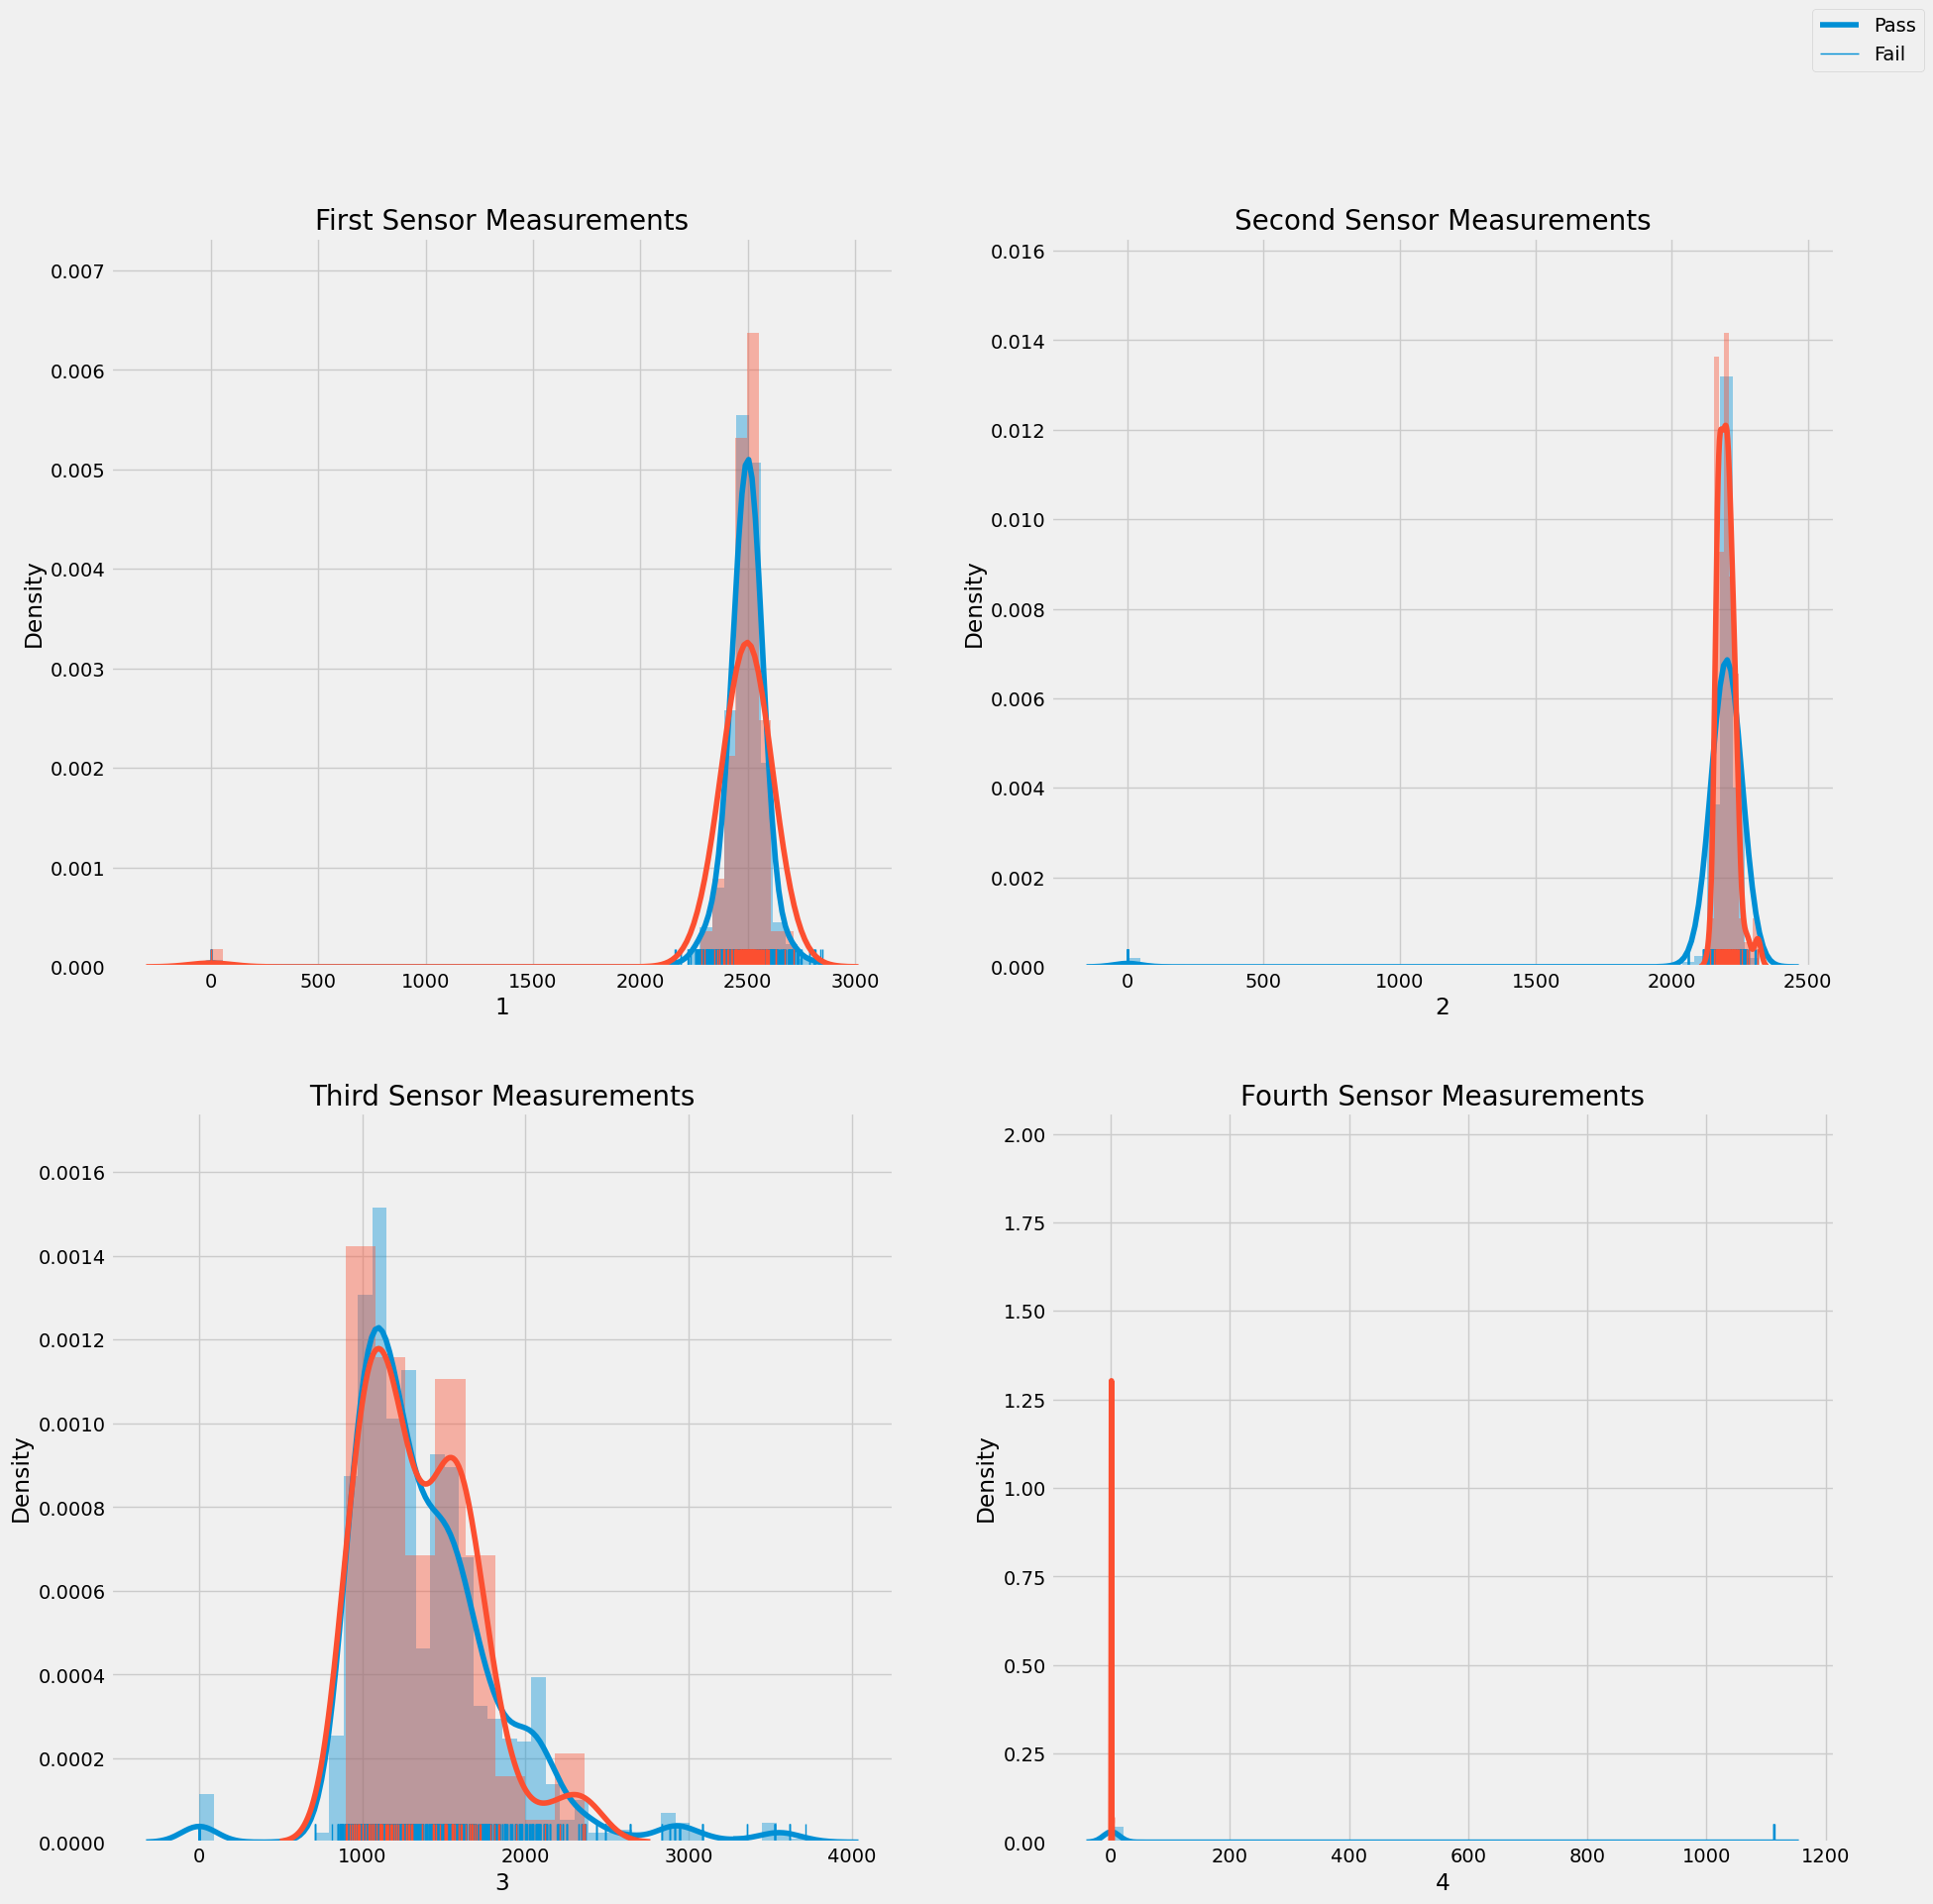

In [7]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()


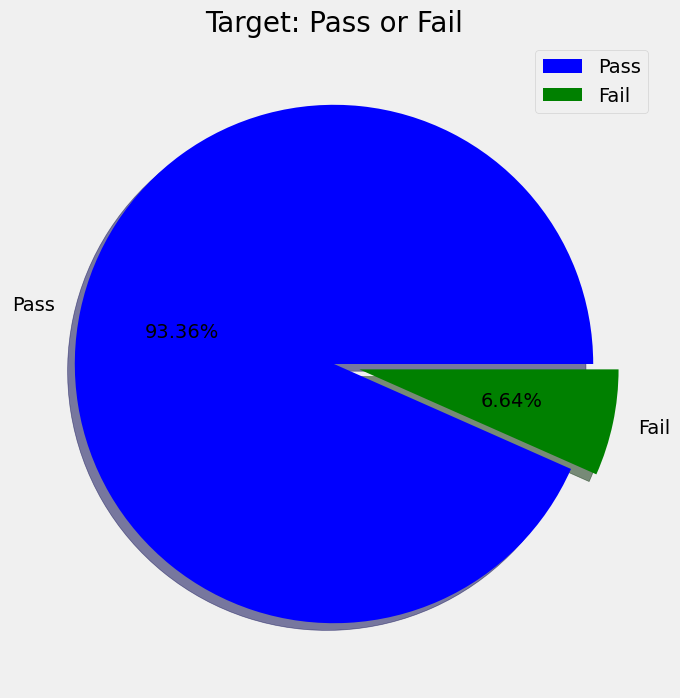

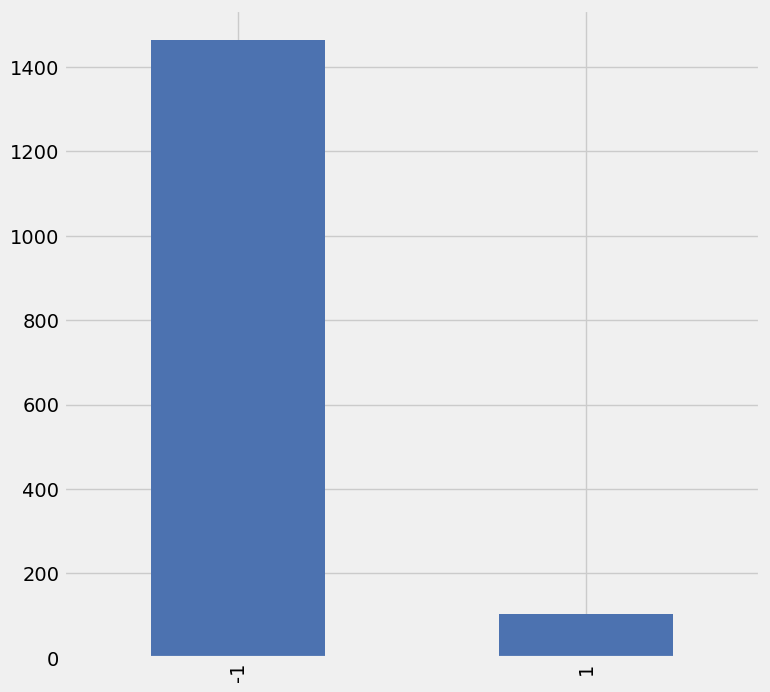

In [8]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

labels = ['Pass', 'Fail']
size = data['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
data['Pass/Fail'].value_counts().plot(kind="bar");

Text(0.5, 1.0, 'Correlation heatmap for the Data')

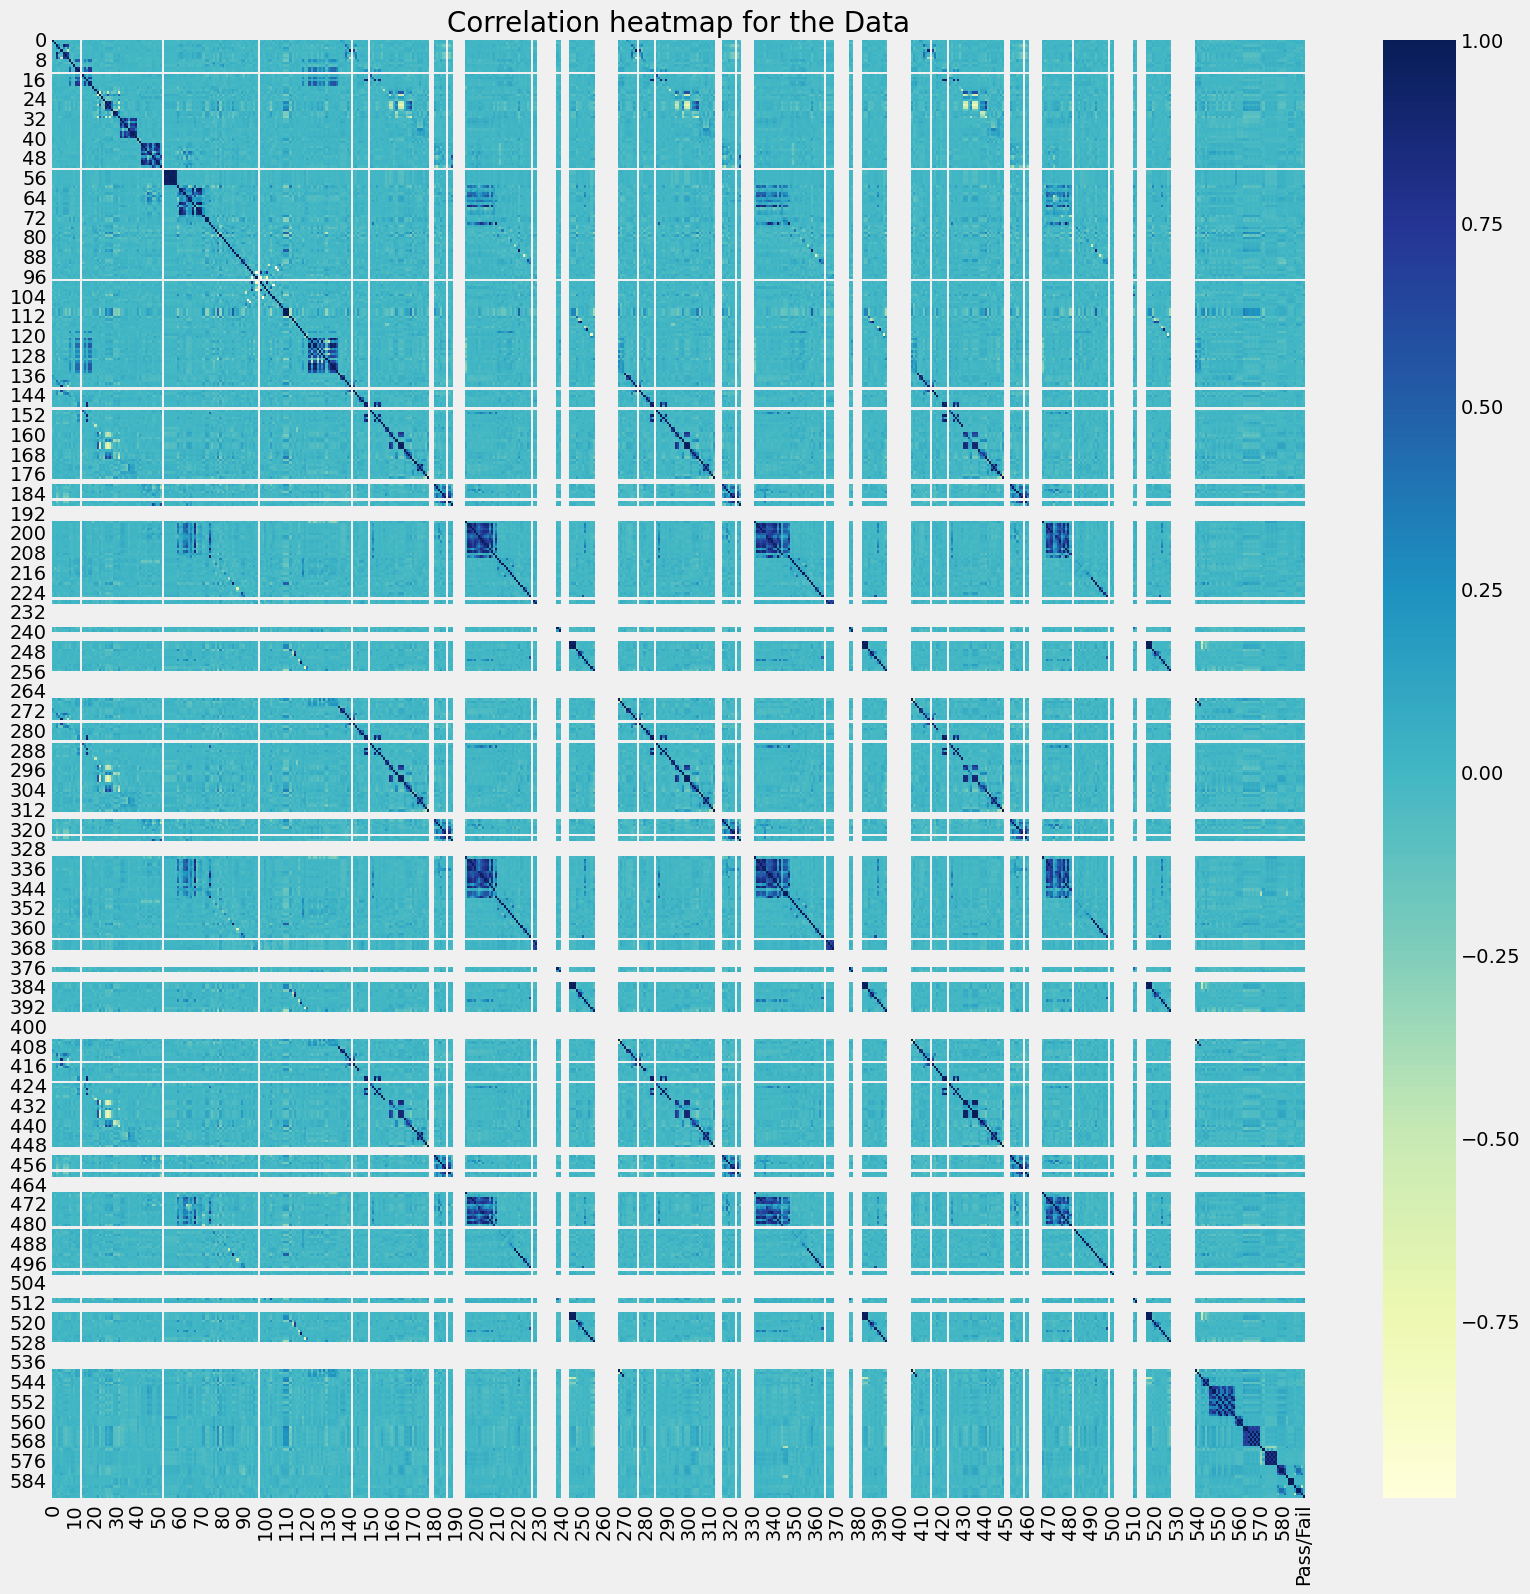

In [9]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

## Data Cleaning/Preprocessing

In [10]:
#Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [11]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
data = remove_collinear_features(data,0.70)

5 | 2 | 0.99
6 | 2 | 0.82
6 | 5 | 0.84
7 | 2 | 0.75
7 | 5 | 0.77
12 | 11 | 0.83
17 | 11 | 0.81
18 | 11 | 0.72
18 | 12 | 0.79
18 | 17 | 0.9
22 | 21 | 0.75
26 | 25 | 0.83
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.88
35 | 34 | 0.83
37 | 32 | 0.75
37 | 34 | 0.75
38 | 32 | 0.72
38 | 34 | 0.72
38 | 36 | 0.71
38 | 37 | 0.97
39 | 32 | 0.81
39 | 34 | 0.91
39 | 35 | 0.71
39 | 37 | 0.86
39 | 38 | 0.84
43 | 42 | 0.82
44 | 42 | 0.82
46 | 42 | 0.84
46 | 43 | 0.84
46 | 45 | 0.74
48 | 44 | 0.77
49 | 42 | 1.0
49 | 43 | 0.82
49 | 44 | 0.82
49 | 46 | 0.84
50 | 42 | 0.88
50 | 43 | 0.9
50 | 46 | 0.97
50 | 49 | 0.88
51 | 47 | 0.71
54 | 53 | 1.0
55 | 53 | 0.95
55 | 54 | 0.95
56 | 53 | 0.98
56 | 54 | 0.97
56 | 55 | 0.96
57 | 53 | 0.97
57 | 54 | 0.96
57 | 55 | 0.98
57 | 56 | 0.99
58 | 53 | 0.93
58 | 54 | 0.93
58 | 55 | 0.92
58 | 56 | 0.96
58 | 57 | 0.94
61 | 60 | 0.88
65 | 64 | 0.85
66 | 60 | 0.97
66 | 61 | 0.84
66 | 62 | 0.75
68 | 60 | 0.85
68 | 61 | 0.87
68 | 66 | 0.85
69 | 60 | 0.96
69 | 61 |

In [12]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
data.shape

(1567, 307)

In [13]:
data.head()

,0,1,2,3,4,8,9,10,11,13,...,570,571,572,578,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,0.0,...,533.8500,2.1113,8.95,0.0000,0.5005,0.0118,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,-0.0005,-0.0148,0.9627,0.0,...,535.0164,2.4335,5.92,0.0096,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0013,0.9615,0.0,...,535.0245,2.0293,11.21,0.0584,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,-0.0124,-0.0033,0.9629,0.0,...,530.5682,2.0253,9.33,0.0202,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,-0.0031,-0.0072,0.9569,0.0,...,532.0155,2.0275,8.83,0.0000,0.4800,0.4766,0.0202,0.0149,73.8432,-1


In [14]:
# separating the dependent and independent data

x = data.iloc[:,:306]
y = data["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 306)
shape of y: (1567,)


In [15]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 306)
shape of x_test:  (471, 306)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [16]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## XGBoost Algorithm (Normal data)

In [17]:
model = XGBClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[13:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

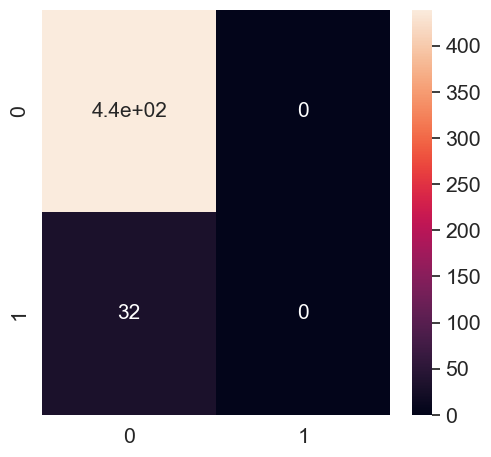

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [19]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  93.20594479830149


#### In the failure class we have only 1 observation classified correctly for XGBoost but still has 94.5% accuracy as we predicted correctly on the observations that passed

## Random Forest Classifier (Normal Data)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<AxesSubplot:>

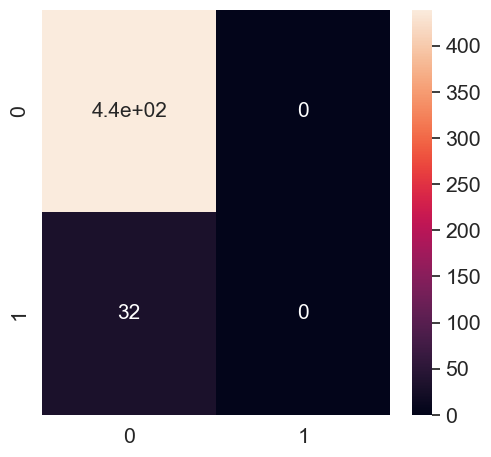

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [22]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  93.20594479830149


#### In the failure class we have no observation classified correctly for Random Forest but still has 94.5% accuracy as we predicted correctly on the observations that passed

## Logistic Regression (Normal Data)

In [23]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)

<AxesSubplot:>

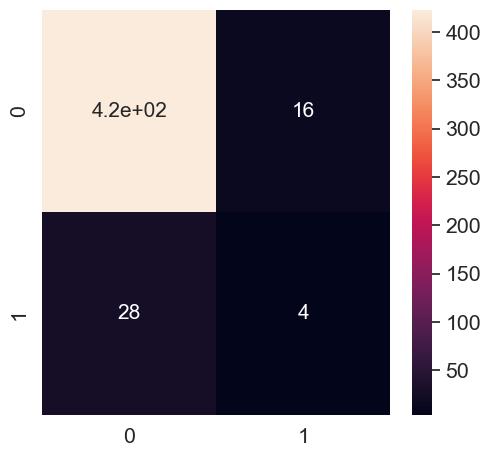

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [25]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  90.65817409766454


#### In the failure class we have 4 observation classified correctly for logistic regression and 88% accuracy as we predicted correctly on the observations that passed. So even though this model has lesser accuracy it is preferable over previous models as at least it is classifying more observations in the failure class correctly

## Lasso (Normal Data)

In [26]:

lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train,y_train)
#print ("Lasso model:", (lasso.coef_))

y_pred = lasso.predict(x_test)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [27]:
print("Accuracy: ", lasso.score(x_test,y_test)*100)

Accuracy:  -0.007974076019068299


<AxesSubplot:>

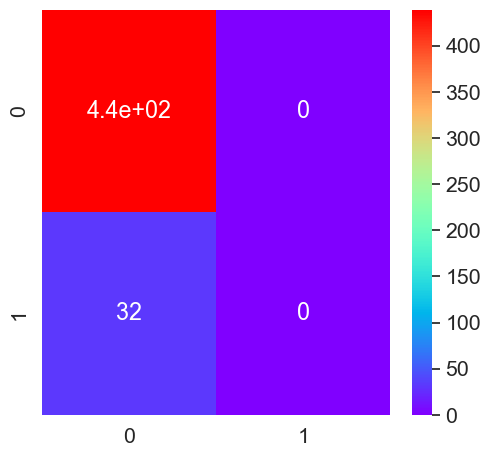

In [28]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

## UnderSampling of the Dataset

In [29]:
# Under Sampling - Check how many failure observations are there
# We have 104 such observations

failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [30]:
# Check how many pass observations are there
# We have 1,463 such observations

normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [31]:
# Get 104 random observations from the pass class as well

random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [32]:
#Getting a 50-50 representation from both pass and fail classes
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [33]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [34]:

# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 306)
(208, 1)


In [35]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(145, 306)
(145, 1)
(63, 306)
(63, 1)


In [36]:
# standardization

sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

## Xg-Boost Classifier (Undersampling)

In [37]:


model = XGBClassifier(random_state=1)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

[13:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Confusion Matrix after UnderSampling with XgBoost

<AxesSubplot:>

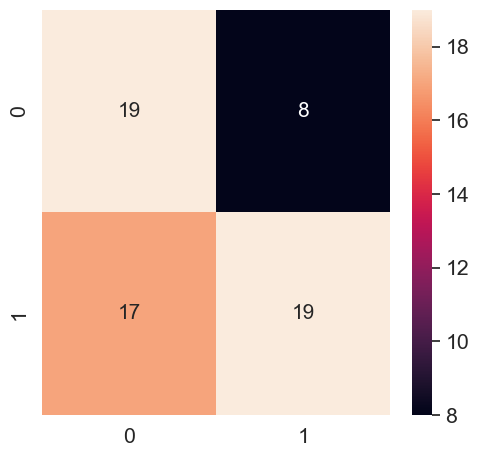

In [38]:


cm = confusion_matrix(y_test_us, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

# It is able to predict 26 defected semiconductors among 35 Semi-Conductors

In [39]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  50.10615711252654


## Grid Search - XG Boost (Undersampling)

In [40]:
# Applying Grid Search CV to find the best model with the best parameters



parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

[13:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

Best Accuracy:  66.89655172413794
Best Parameter:  {'cv': 2, 'max_depth': 4, 'random_state': 1}


In [42]:


weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

[13:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cv, scale_pos_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  33.33333333333333


## Confusion matrix XG Boost - Grid Search (Undersample)

<AxesSubplot:>

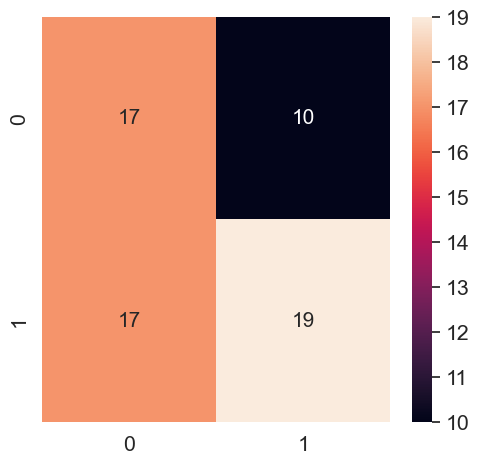

In [44]:
cm = confusion_matrix(y_test_us, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

**Most Important Features of the Model**

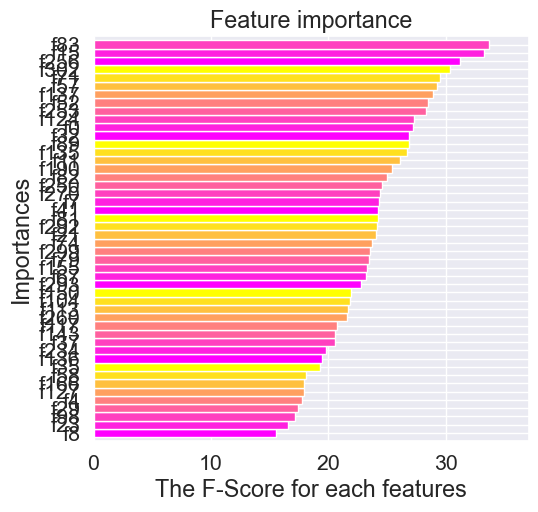

In [45]:
# plotting the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (100, 100)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

## Over-Sampling with SMOTE

In [61]:
x_resample, y_resample = SMOTE(random_state=1).fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(222, 306)
(222,)


In [62]:


x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_os.shape)
print(y_train_os.shape)
print(x_test_os.shape)
print(y_test_os.shape)

(145, 306)
(145, 1)
(63, 306)
(63, 1)


In [63]:
# standardization



sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

## Xg-Boost Classifier - Grid Search (Oversampling)

In [68]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(random_state=1)

model.fit(x_train_os, y_train_os)

y_pred = model.predict(x_test_os)

[13:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

# making a parameters list
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
grid_search = grid_search.fit(x_train_os, y_train_os)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_



[13:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.6689655172413793
Best Parameter:  {'cv': 2, 'max_depth': 4, 'random_state': 1}


In [70]:


weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)

model.fit(x_train_os, y_train_os)

y_pred = model.predict(x_test_os)


[13:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cv, scale_pos_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Confusion Matrix after OverSampling with XgBoost

<AxesSubplot:>

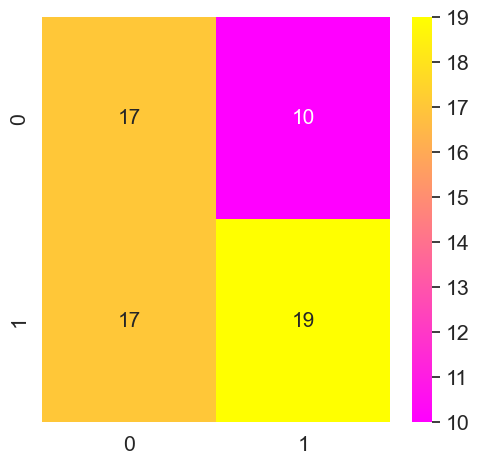

In [74]:


cm = confusion_matrix(y_test_os, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, cmap = 'spring')

In [75]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  33.33333333333333


## Random Forest (Oversampling)

In [76]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_os, y_train_os)
#scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test_os)
print("Accuracy: ", model.score(x_test_os,y_test_os)*100)

Accuracy:  61.904761904761905


C:\Users\manve\AppData\Local\Temp\ipykernel_30000\3958726046.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_os, y_train_os)


## Random Forest - (Oversampled) - Confusion Matrix

<AxesSubplot:>

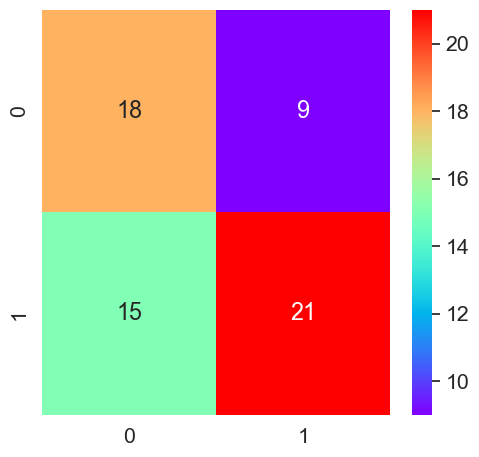

In [77]:
# printing the confusion matrix
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

## Logistic regression - (Oversampled)

In [78]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_os, y_train_os) 
y_pred = lr.predict(x_test_os)

print("Accuracy: ", lr.score(x_test_os,y_test_os)*100)

Accuracy:  53.96825396825397


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic regression (Oversampled) - Confusion matrix

<AxesSubplot:>

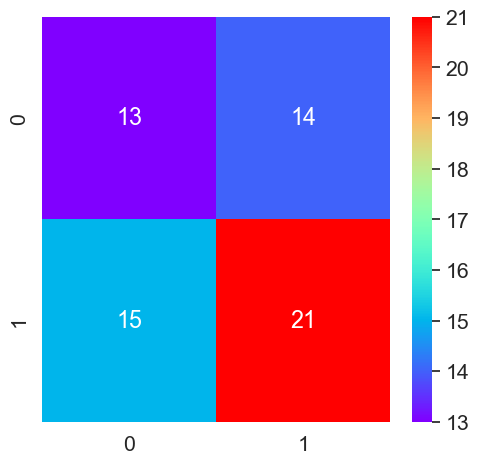

In [79]:
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

## Random Forest - (Undersampled)

In [80]:

model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
#scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test_us)

C:\Users\manve\AppData\Local\Temp\ipykernel_30000\755603951.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_us, y_train_us)


## Confusion Matrix for Random Forest (Undersampled)

<AxesSubplot:>

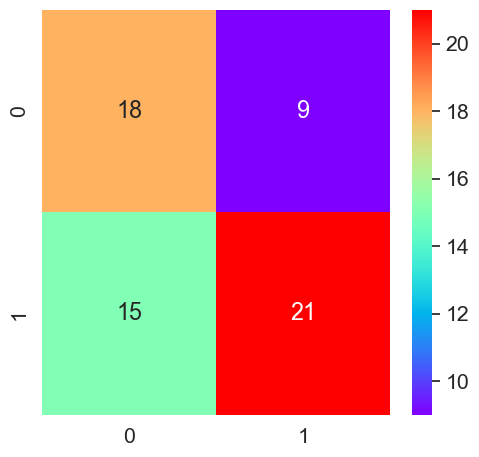

In [81]:
# evaluating the model

# printing the confusion matrix
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [82]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  47.77070063694268


## Using Lasso (Undersampled)

In [83]:

lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_us,y_train_us)
#print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.1, random_state=1)

In [84]:
y_pred = lasso.predict(x_test_us)

In [85]:
print(y_pred)

[ 0.09942379  0.09726004 -0.26452337 -0.18631926 -0.15281416 -0.07724172
  0.09498366 -0.00216858 -0.05119945 -0.315719   -0.21426822 -0.12461875
  0.08101863 -0.43057109 -0.35323486  0.00903678  0.01271222  0.43753378
  0.3082319  -0.01200918 -0.01610526 -0.22843703  0.4005101   0.10388245
  0.3295718  -0.1597619   0.19402898 -0.23743596 -0.30249152 -0.17915147
  0.44759661  0.02397076  0.45285737  0.16715031 -0.25258232  0.14693904
  0.28317795  0.56106464  0.07761946 -0.16711128 -0.04053717 -0.02727338
  0.33752895  0.11877575 -0.44032082 -0.22446098  0.14729243  0.1769406
 -0.39266445 -0.25888698 -0.17915147  0.2931231   0.29670089  0.14108142
  0.04431882  0.44368512 -0.5210443  -0.12683009 -0.16424009 -0.59596285
 -0.21963891  0.29053215  0.09739126]


In [86]:
print(y_test_us)

      Pass/Fail
1352         -1
543          -1
344           1
897          -1
495           1
...         ...
1302          1
273           1
574          -1
772          -1
441           1

[63 rows x 1 columns]


In [87]:
#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

## Confusion matrix for Lasso (Undersampled)

<AxesSubplot:>

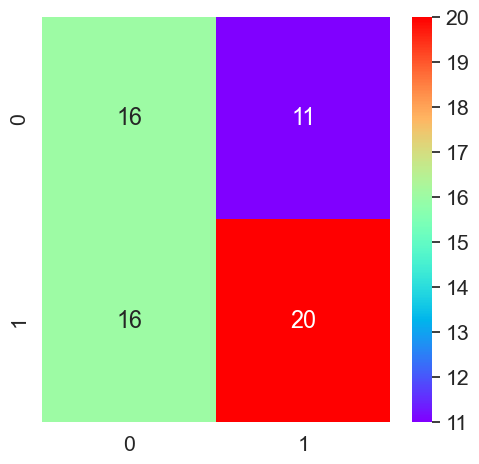

In [88]:
cm = confusion_matrix(y_test_us, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [89]:
print("Accuracy: ", lasso.score(x_test_us,y_test_us)*100)

Accuracy:  2.1830344994811623


## Logistic Regression (Undersampled)

In [90]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [91]:
y_pred = lr.predict(x_test_us)

## Confusion matrix for Logistic Regression (Undersampled)

<AxesSubplot:>

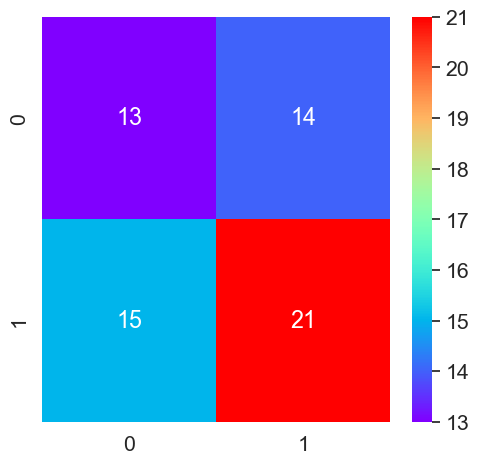

In [92]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [93]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  52.653927813163484


> **Local Outlier Factor Classifier,** Succesfully detected 11 defected items out of 13, that makes an impeccable accuracy of 85% Recall Accuracy. This algorithm would have been worked even better if the data was a little bigger with more instances of defected items.

## One Class SVM (Undersampled)

> In one-class SVM, the support vector model is trained on data that has only one class, which is the “normal” class. It infers the properties of normal cases and from these properties can predict which examples are unlike the normal examples. This is useful for anomaly detection because the scarcity of training examples is what defines anomalies: that is, typically there are very few examples of the network intrusion, fraud, or other anomalous behavior.

In [96]:


model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1)

model.fit(x_train_us, y_train_us)
y_pred = model.fit_predict(x_test_us)


## Confusion Matrix for One Class SVM

<AxesSubplot:>

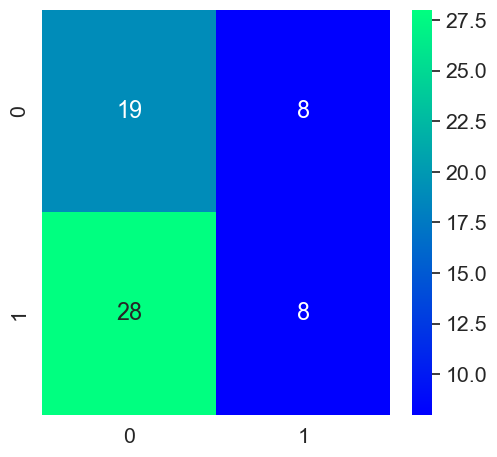

In [97]:

# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm ,annot = True, cmap = 'winter')


In [98]:
#print("Accuracy: ", model.score(x_test,y_test)*100)

## OneClassSVM - (Oversampled) 

In [100]:
model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1)

model.fit(x_train_os, y_train_os)
y_pred = model.fit_predict(x_test_os)

## Confusion matrix for OneClassSVM - (Oversampled)

<AxesSubplot:>

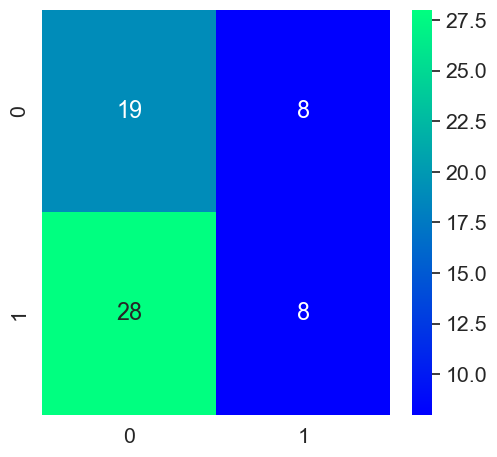

In [101]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm ,annot = True, cmap = 'winter')

## Using PCA for demensionality reduction

In [102]:
#Scaling the data before applying PCA
from scipy.stats import zscore
data_new=data.iloc[:,:306].apply(zscore)
data_new.head()

,0,1,2,3,4,8,9,10,11,13,...,565,570,571,572,578,582,583,586,587,589
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.436850,1.128343,-0.381523,-0.481360,NaN,...,-1.305710,0.190142,0.034410,-0.226018,-0.662093,0.055275,-0.204269,-1.734706,-1.868461,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.393723,0.022511,-1.608226,-0.011526,NaN,...,-1.305710,0.256816,1.205944,-0.261137,0.083539,0.162312,0.407145,-0.958144,0.412587,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,-0.192349,0.327111,0.124224,-0.044305,NaN,...,5.447531,0.257279,-0.263745,-0.199823,3.873831,-0.304064,0.022827,2.989383,3.624211,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.300837,-0.765478,-0.370762,-0.006063,NaN,...,0.464315,0.002548,-0.278290,-0.221613,0.906840,-0.059408,-0.291614,-0.100689,-0.177535,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.465600,-0.149655,-0.790424,-0.169959,NaN,...,-1.305710,0.085279,-0.270290,-0.227409,-0.662093,-1.512057,26.860983,-0.100689,-0.177535,-0.274469


In [103]:
data_new.isnull().any().any()

True

In [105]:
data_new = data_new.replace(np.NaN, 0)

In [106]:
data_new.isnull().any().any()

False

In [107]:
# separating the dependent and independent data

x = data_new.iloc[:,:306]
y = data["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 306)
shape of y: (1567,)


In [108]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(x.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00063857 -0.04781282  0.00759455 ...  0.04477373  0.00523674
   0.02150242]
 [-0.04781282  1.00063857 -0.03046719 ... -0.00922529  0.03950455
   0.04449214]
 [ 0.00759455 -0.03046719  1.00063857 ...  0.01574304 -0.00709495
  -0.03045388]
 ...
 [ 0.04477373 -0.00922529  0.01574304 ...  1.00063857  0.16974222
  -0.48505059]
 [ 0.00523674  0.03950455 -0.00709495 ...  0.16974222  1.00063857
   0.39175294]
 [ 0.02150242  0.04449214 -0.03045388 ... -0.48505059  0.39175294
   1.00063857]]


In [109]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.0253695   0.008654   -0.00303277 ...  0.          0.
   0.        ]
 [-0.0025788  -0.00538507 -0.03440905 ...  0.          0.
   0.        ]
 [ 0.02753407 -0.00681287 -0.01400105 ...  0.          0.
   0.        ]
 ...
 [-0.048536    0.05395333 -0.04823939 ...  0.          0.
   0.        ]
 [ 0.01242541 -0.02265625  0.00838096 ...  0.          0.
   0.        ]
 [ 0.0256921  -0.06086426  0.04287574 ...  0.          0.
   0.        ]]

 Eigen Values 
%s [7.98315826 4.02662836 3.83340365 3.77872193 3.24842052 3.04338189
 2.81987221 2.70184859 2.63844411 2.49433697 2.39544185 2.33496444
 2.2688959  2.21004546 2.18253643 2.11987395 2.06331064 2.02389709
 2.01071359 1.99863763 1.98267329 1.95915582 1.92095551 1.8898469
 1.85708597 1.83222209 1.79047783 1.77162466 1.74830769 1.69223045
 1.6721054  1.64351825 1.63509768 1.61120278 1.59353955 1.58746461
 1.54878319 1.54342972 1.51376615 1.4987913  1.39927034 1.42330375
 1.46908609 1.45916185 1.45031371 0.01374972 0.0273

In [110]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  4.11240397   6.18666104   8.16138131  10.10793312  11.78130812
  13.34906055  14.80167533  16.19349202  17.55264684  18.83756703
  20.07154289  21.27436472  22.44315234  23.58162404  24.70592487
  25.79794607  26.86082953  27.90340969  28.93919857  29.96876671
  30.99011105  31.99934072  32.98889207  33.96241829  34.91906821
  35.86290988  36.78524762  37.69787343  38.59848786  39.47021494
  40.3315749   41.17820862  42.02050462  42.85049151  43.67137946
  44.48913799  45.28697037  46.08204499  46.86183886  47.63391867
  48.39069629  49.14236158  49.88946889  50.62266242  51.3434755
  52.05100785  52.75441472  53.44575446  54.13150394  54.80518611
  55.47224219  56.13386282  56.78335336  57.43035818  58.06247379
  58.68657041  59.30627663  59.91402001  60.51888826  61.11881541
  61.71313647  62.30277087  62.88054936  63.45680398  64.02642122
  64.58794689  65.14526769  65.69372362  66.23286709  66.7660594
  67.29318433  67.81743689  68.33600263  68.8483

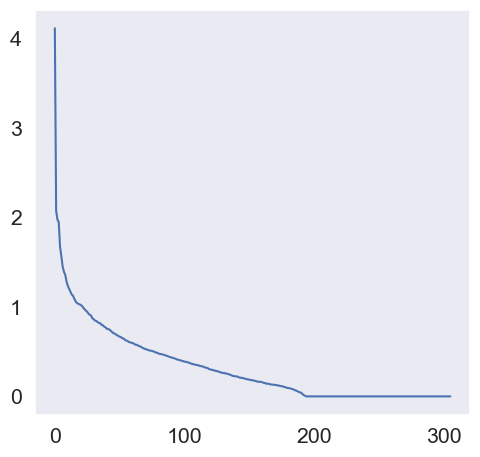

In [111]:
plt.plot(var_exp)

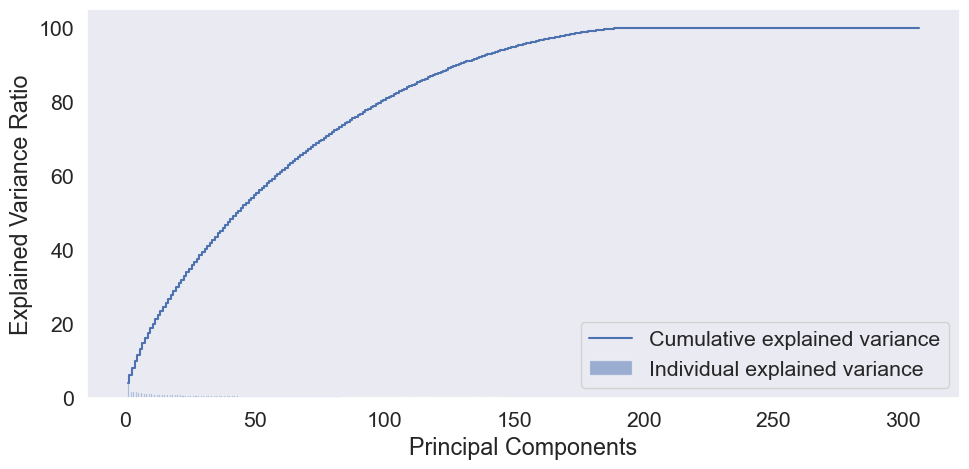

In [112]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [113]:
len(cum_var_exp)

306

In [114]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 130 PCA dimensions (dimensionality reduction from 306 to 130)
# For 130 components we are getting approximately 90% of the variance
pca = PCA(n_components=130)
data_reduced = pca.fit_transform(x)
data_reduced.transpose()

array([[ 3.26185738,  1.81272146,  2.21584832, ..., -5.38608148,
        -4.57166163, -5.2892201 ],
       [ 0.08040641,  0.84621575,  0.26223468, ..., 34.89717172,
         4.06179055, 35.38533928],
       [-0.21096337, -0.95987088, -1.19347831, ...,  3.05903551,
         2.00040228,  5.14355385],
       ...,
       [-0.44425581, -0.1594252 ,  0.16828514, ..., -0.76678506,
         0.96046994, -0.39329661],
       [-0.61089771,  0.17835855, -0.69183821, ..., -0.35451418,
         0.1779838 , -0.49025903],
       [ 0.10196531,  0.71411938,  1.17873707, ..., -0.74109786,
        -0.62324026, -0.49851696]])

In [115]:
pca.components_

array([[-0.02536947, -0.00257878,  0.02753406, ..., -0.04853603,
         0.01242537,  0.02569214],
       [-0.00865401,  0.00538579,  0.00681345, ..., -0.05395467,
         0.02265581,  0.06086401],
       [-0.00303287, -0.03441012, -0.01400067, ..., -0.0482382 ,
         0.00838217,  0.04287474],
       ...,
       [-0.05089609, -0.0265944 , -0.07261328, ...,  0.07754452,
         0.1167025 , -0.01733274],
       [-0.02927997,  0.04479261,  0.07260149, ...,  0.10371619,
        -0.00295742, -0.01806608],
       [-0.03660699,  0.07139343,  0.06634223, ...,  0.02839466,
         0.07036161, -0.02447521]])

In [116]:
df_comp = pd.DataFrame(pca.components_,columns=list(x))
df_comp.head()

,0,1,2,3,4,8,9,10,11,13,...,565,570,571,572,578,582,583,586,587,589
0,-0.025369,-0.002579,0.027534,-0.066608,-0.024699,0.077981,-0.031003,0.017991,-0.011328,8.271806e-25,...,-0.103563,-0.017317,0.095065,-0.020350,-0.006379,-0.012915,0.006665,-0.048536,0.012425,0.025692
1,-0.008654,0.005386,0.006813,0.043185,0.000092,-0.217424,0.002422,0.042956,-0.307618,1.734723e-18,...,0.013688,-0.015341,0.029587,0.013740,0.039335,0.006929,0.006354,-0.053955,0.022656,0.060864
2,-0.003033,-0.034410,-0.014001,-0.003741,-0.003487,-0.062299,-0.011085,-0.037443,-0.033603,0.000000e+00,...,-0.032975,-0.007389,-0.011179,-0.008240,-0.029706,-0.048941,0.013379,-0.048238,0.008382,0.042875
3,-0.011015,0.019496,0.031019,0.008144,0.037433,0.027089,-0.034177,0.030429,0.011601,1.665335e-16,...,0.042446,-0.031510,-0.018133,0.031905,0.048759,0.010023,0.018019,0.021472,-0.018804,-0.007798
4,-0.001608,-0.024106,-0.050006,-0.037777,-0.031000,0.003794,-0.003777,-0.000664,-0.092508,4.163336e-17,...,-0.051720,-0.022406,0.033661,0.025769,-0.102882,-0.021633,-0.015484,0.035704,-0.088357,-0.083099


<AxesSubplot:>

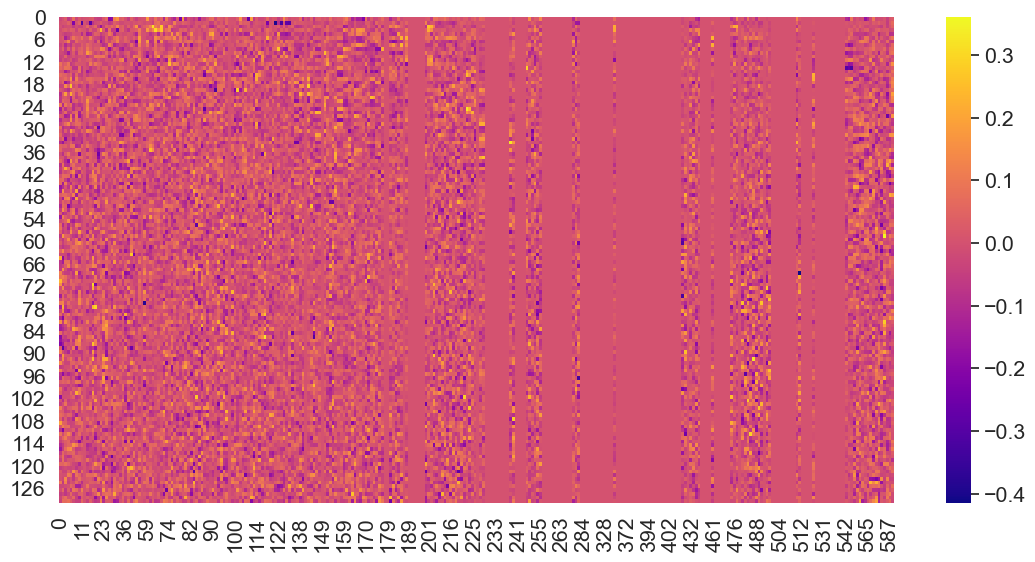

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [118]:
data_reduced.shape

(1567, 130)

In [119]:
df_red2 = pd.DataFrame(data_reduced)
df_red2.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,3.261857,0.080406,-0.210963,-0.872237,-0.618834,0.753399,-0.013326,-0.573561,-3.190487,1.890520,...,0.842085,0.305567,-0.681031,0.722765,-0.123554,0.185296,0.054916,-0.444256,-0.610898,0.101965
1,1.812721,0.846216,-0.959871,-0.070670,0.165651,0.658101,-1.083664,0.301244,-2.560502,1.302680,...,0.629302,0.966187,0.897779,-0.610239,-0.871784,0.280311,0.243343,-0.159425,0.178359,0.714119
2,2.215848,0.262235,-1.193478,2.265413,-1.239113,-0.951813,2.024022,0.906332,-1.154385,-1.809554,...,-0.564828,0.327732,1.241749,0.637248,-0.269307,-0.250725,0.442622,0.168285,-0.691838,1.178737
3,3.617102,0.816477,-0.816343,2.151955,-2.614156,-1.408041,1.173355,0.844165,-0.291559,-2.767964,...,2.261274,-2.221587,-3.689868,-2.661467,0.551524,-2.092743,1.945490,0.420589,-0.829024,-0.487868
4,2.765986,0.133833,1.444724,2.270367,-1.498222,-0.624016,-2.928605,-1.895962,2.505765,1.484502,...,-0.027352,-0.416327,-0.283437,-0.126041,-0.634228,-1.377844,-0.462612,0.343938,-0.082488,0.381080


In [120]:
df_red3 = df_red2.copy()
df_red4 = df_red3
df_red4["Pass/Fail"] = data["Pass/Fail"]

In [121]:
df_red4.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,Pass/Fail
0,3.261857,0.080406,-0.210963,-0.872237,-0.618834,0.753399,-0.013326,-0.573561,-3.190487,1.890520,...,0.305567,-0.681031,0.722765,-0.123554,0.185296,0.054916,-0.444256,-0.610898,0.101965,-1
1,1.812721,0.846216,-0.959871,-0.070670,0.165651,0.658101,-1.083664,0.301244,-2.560502,1.302680,...,0.966187,0.897779,-0.610239,-0.871784,0.280311,0.243343,-0.159425,0.178359,0.714119,-1
2,2.215848,0.262235,-1.193478,2.265413,-1.239113,-0.951813,2.024022,0.906332,-1.154385,-1.809554,...,0.327732,1.241749,0.637248,-0.269307,-0.250725,0.442622,0.168285,-0.691838,1.178737,1
3,3.617102,0.816477,-0.816343,2.151955,-2.614156,-1.408041,1.173355,0.844165,-0.291559,-2.767964,...,-2.221587,-3.689868,-2.661467,0.551524,-2.092743,1.945490,0.420589,-0.829024,-0.487868,-1
4,2.765986,0.133833,1.444724,2.270367,-1.498222,-0.624016,-2.928605,-1.895962,2.505765,1.484502,...,-0.416327,-0.283437,-0.126041,-0.634228,-1.377844,-0.462612,0.343938,-0.082488,0.381080,-1


In [122]:
df_red4.shape

(1567, 131)

In [123]:
#Causing system crash and taking too much time, so commented out
#sns.pairplot(df_red4,diag_kind='kde')

array([[<AxesSubplot:title={'center':'0'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'1'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'2'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'3'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'4'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'5'}, xlabel='Pass/Fail'>]],
      dtype=object)

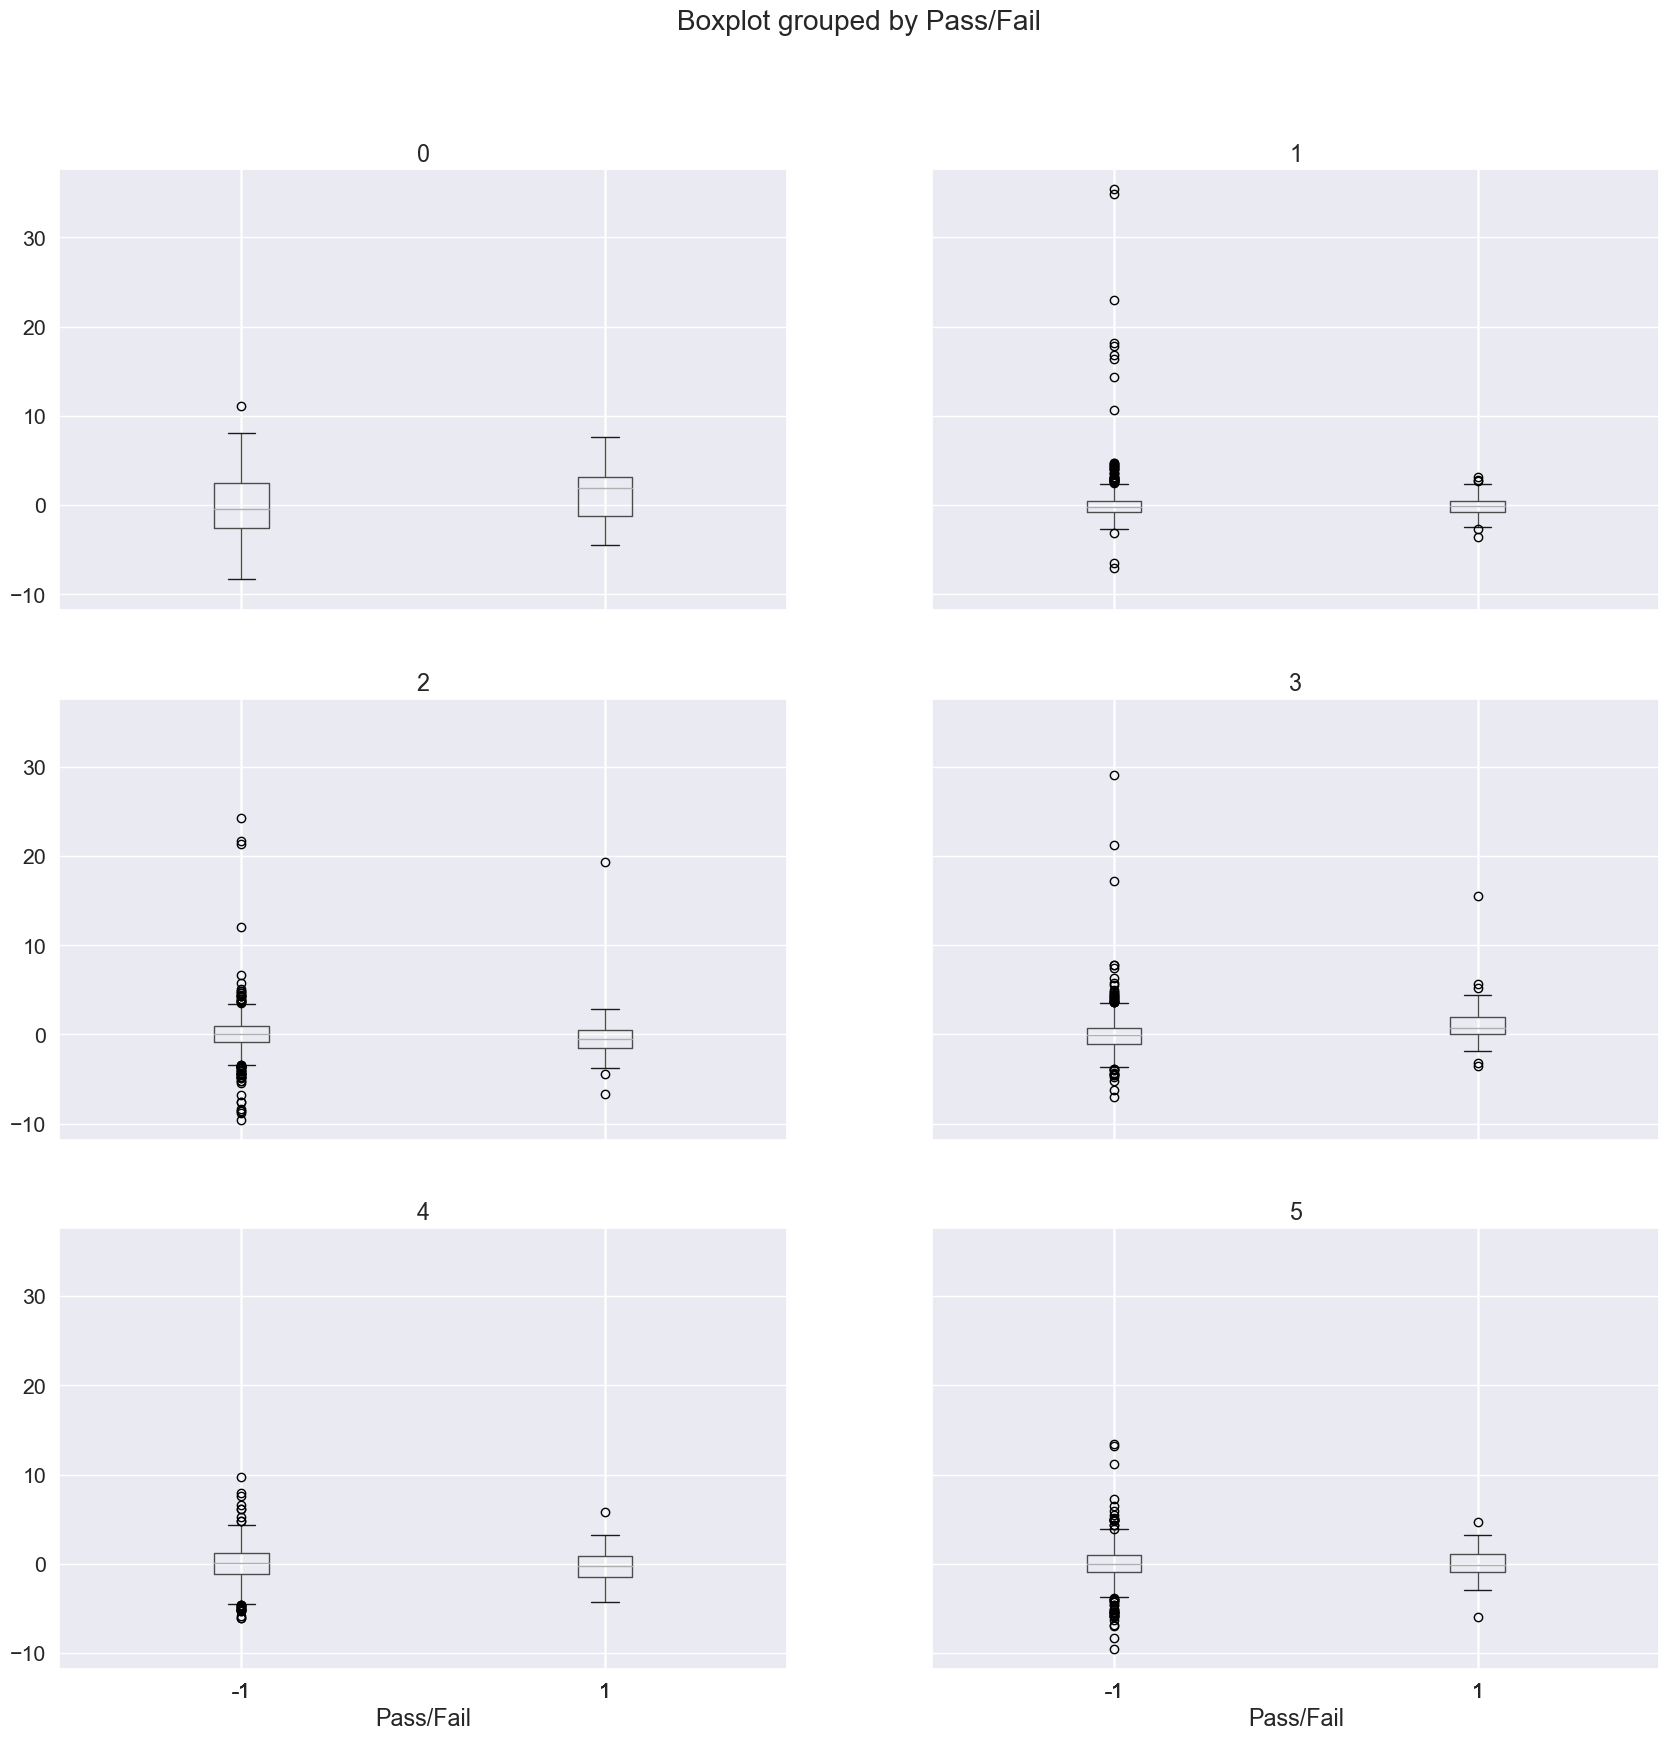

In [124]:
#Sample boxplot shows that there are outliers in the data, let us fix them
df_red4.boxplot(column = [df_red4.columns[0],
                          df_red4.columns[1],
                          df_red4.columns[2],
                          df_red4.columns[3], 
                          df_red4.columns[4],
                          df_red4.columns[5],
                         ]
                          , by = 'Pass/Fail', figsize=(20,20))

In [125]:
#Create a copy of the dataset for maintain data after outlier removal
#Here after identifying outliers we replace with median
pd_data = df_red4.copy()
#pd_data.head()

#pd_data2 = pd_data.drop(columns=['name'],axis=1)
#pd_data2 = pd_data2.apply(replace,axis=1)
from scipy import stats

#Define a function to remove outliers on max side
def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

#Define a function to remove outliers on min side
def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

#Loop over the columns and remove the outliers on min and max side
for column in pd_data:
    pd_data[column] = outlier_removal_max(pd_data[column])
    pd_data[column] = outlier_removal_min(pd_data[column])

array([[<AxesSubplot:title={'center':'0'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'1'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'2'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'3'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'4'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'5'}, xlabel='Pass/Fail'>]],
      dtype=object)

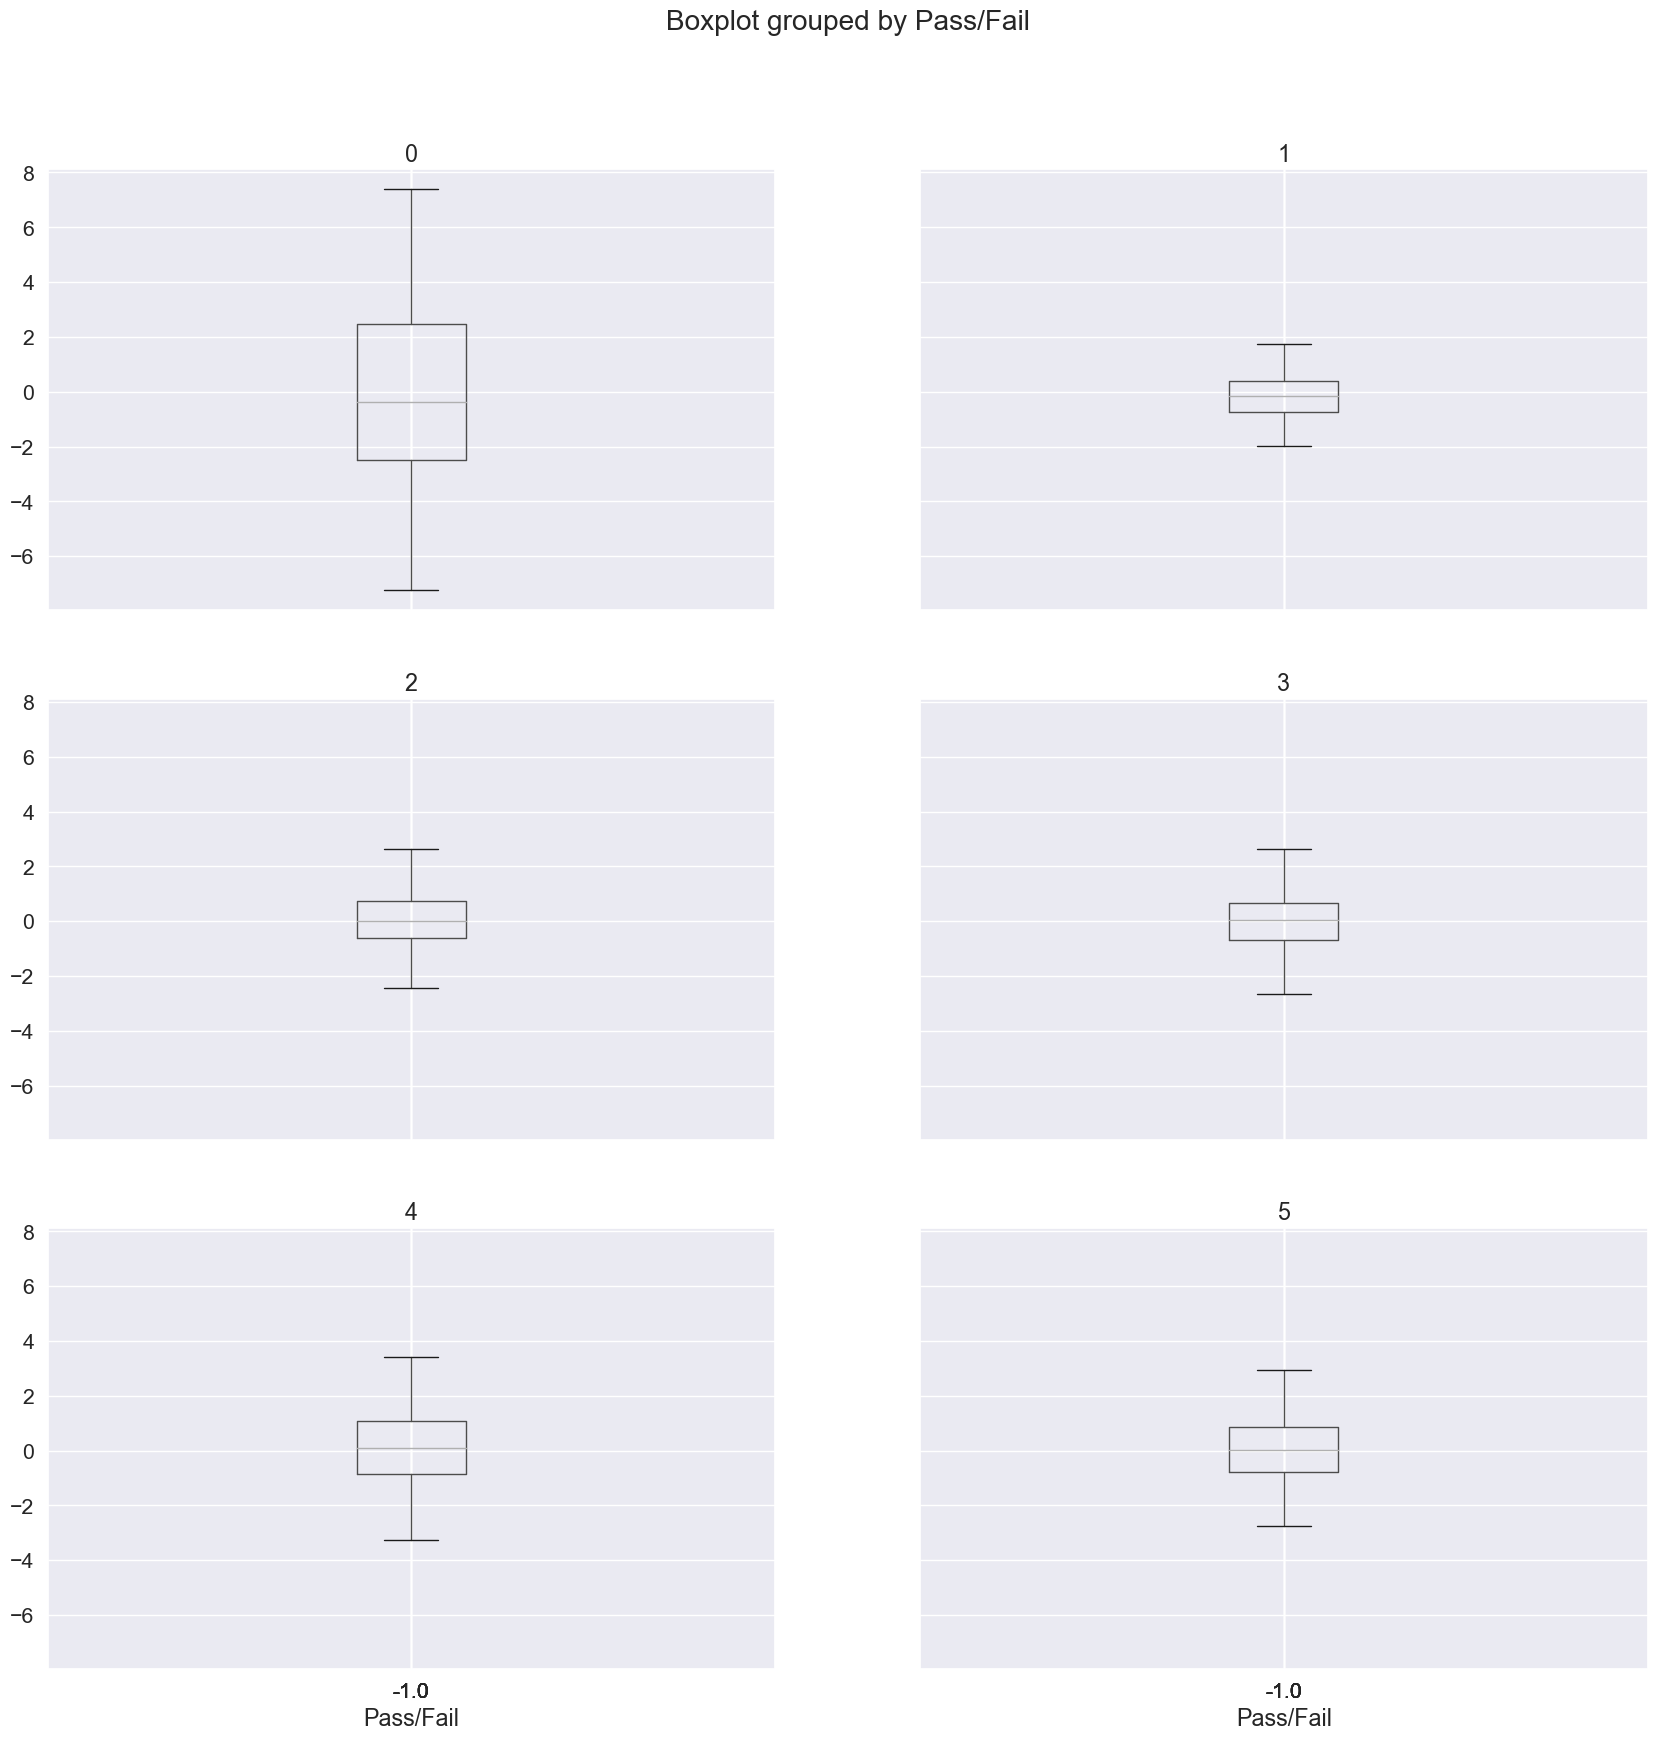

In [126]:
#Sample boxplot shows that outliers are fixed, but we are loosing observations belonging to failure 
#class (Pass/Fail = 1) So we should not remove outliers here 
pd_data.boxplot( column =[df_red4.columns[0],
                          df_red4.columns[1],
                          df_red4.columns[2],
                          df_red4.columns[3], 
                          df_red4.columns[4],
                          df_red4.columns[5],
                         ],by = 'Pass/Fail', figsize=(20,20))

In [127]:
# separating the dependent and independent data

x = df_red4.iloc[:, df_red4.columns != 'Pass/Fail'] 
y = df_red4.iloc[:, df_red4.columns == 'Pass/Fail']

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 130)
shape of y: (1567, 1)


In [128]:
# Under Sampling - Check how many failure observations are there
# We have 104 such observations

failed_tests = np.array(df_red4[df_red4['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [129]:
# Check how many pass observations are there
# We have 1,463 such observations

normal_indices = df_red4[df_red4['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [130]:
# Get 104 random observations from the pass class as well

random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [131]:
#Getting a 50-50 representation from both pass and fail classes
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [132]:
# creating the undersample data

undersample_data = df_red4.iloc[under_sample, :]

# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 130)
(208, 1)


In [133]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(145, 130)
(145, 1)
(63, 130)
(63, 1)


In [134]:
# standardization - completed before PCA itself

#sc = StandardScaler()
#x_train_us = sc.fit_transform(x_train_us)
#x_test_us = sc.transform(x_test_us)


## XGBoost - PCA (undersampled)

In [135]:
model = XGBClassifier(random_state=1)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

cm = confusion_matrix(y_test_us, y_pred)

[13:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program

## Confusion matrix for XG Boost - PCA - (Undersampled)

<AxesSubplot:>

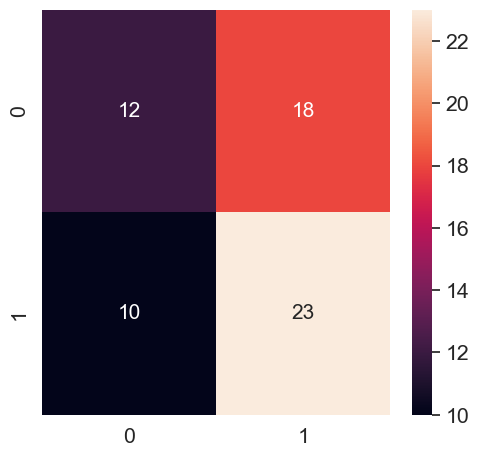

In [136]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})



In [137]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

Accuracy:  55.55555555555556


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## XG Boost - PCA - Grid Search - Undersampled

In [138]:
# Applying Grid Search CV to find the best model with the best parameters



parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
             'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

[13:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy:  69.65517241379311
Best Parameter:  {'cv': 2, 'max_depth': 5, 'random_state': 1}


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program

In [139]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

print("Accuracy: ", model.score(x_test_us,y_test_us)*100)


[13:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { cv, scale_pos_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  52.38095238095239


## Confusion matrix of XG Boost - Grid Search - PCA - Undersampled

<AxesSubplot:>

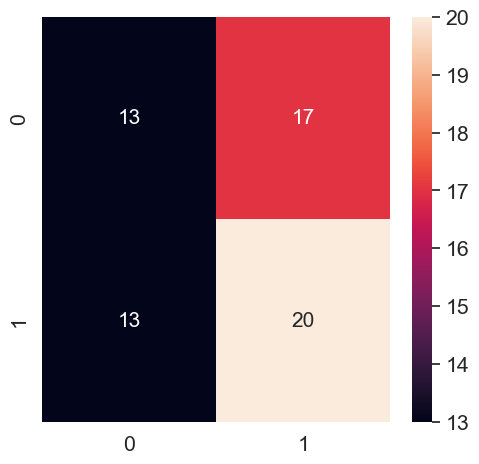

In [140]:
cm = confusion_matrix(y_test_us, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})


## Random Forest - PCA - Undersampled

C:\Users\manve\AppData\Local\Temp\ipykernel_30000\1245810914.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_us, y_train_us)


<AxesSubplot:>

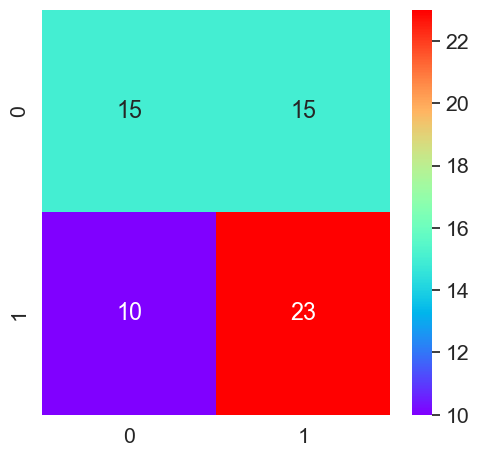

In [141]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
#scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test_us)

# evaluating the model

# printing the confusion matrix
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')



In [142]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

Accuracy:  60.317460317460316


## Logistic Regression - PCA - Undersampled

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

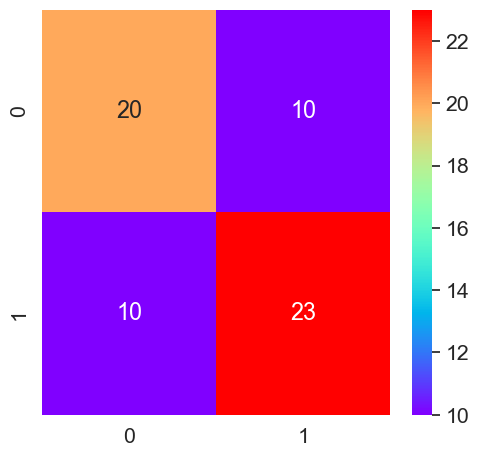

In [143]:

lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us) 
y_pred = lr.predict(x_test_us)
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')


In [144]:
print("Accuracy: ", lr.score(x_test_us,y_test_us)*100)

Accuracy:  68.25396825396825


## Lasso - PCA - Undersampled

In [145]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_us,y_train_us)
#print ("Lasso model:", (lasso.coef_))

y_pred = lasso.predict(x_test_us)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [146]:
actual_cost = list(y_test_us)
actual_cost = np.asarray(actual_cost)
y_pred_lass = lasso.predict(x_test_us)

In [147]:
print("Accuracy: ", lasso.score(x_test_us, y_test_us)*100)

Accuracy:  -4.832915402778171


## Confusion Matrix for Lasso - PCA - Undersampled

<AxesSubplot:>

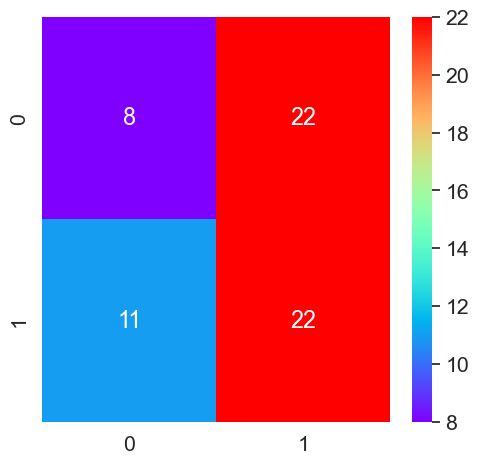

In [148]:

cm = confusion_matrix(y_test_us, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

## Elliptic Envelop technique

In [149]:
# defining outlier fraction for Elliptic Envelop, Isolation Forest and Local Outlier Factor

Fraud = data[data['Pass/Fail']==1]
Valid = data[data['Pass/Fail']==-1]

outlier_fraction = len(Fraud)/float(len(Valid))
print("Outlier Fraction :", outlier_fraction)

Outlier Fraction : 0.0710868079289132


In [150]:
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=outlier_fraction, random_state=1)
model.fit(x_train, y_train)
#scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


<AxesSubplot:>

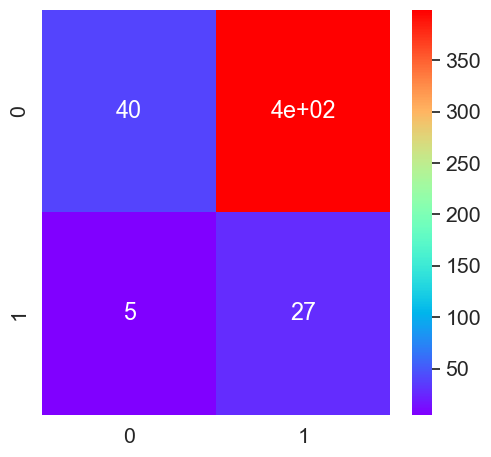

In [151]:
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

## Isolation Forest technique

In [152]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, max_samples=len(x_train), 
                                       contamination=outlier_fraction, random_state=1, verbose=0)
model.fit(x_train, y_train)
scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test)

<AxesSubplot:>

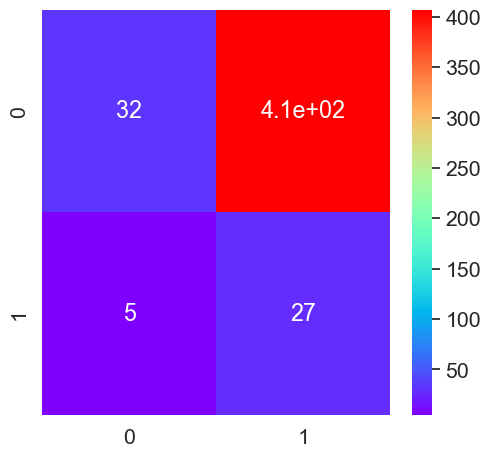

In [153]:
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

## Local Outlier Factor Technique

In [154]:
from sklearn.neighbors import LocalOutlierFactor


model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=outlier_fraction)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)

<AxesSubplot:>

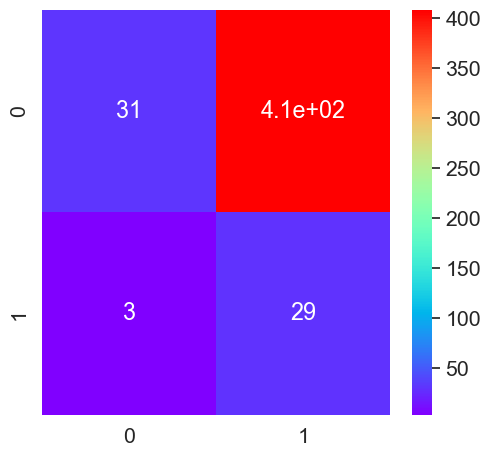

In [155]:
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

## Comparison of All Algorithms' Recall Rate

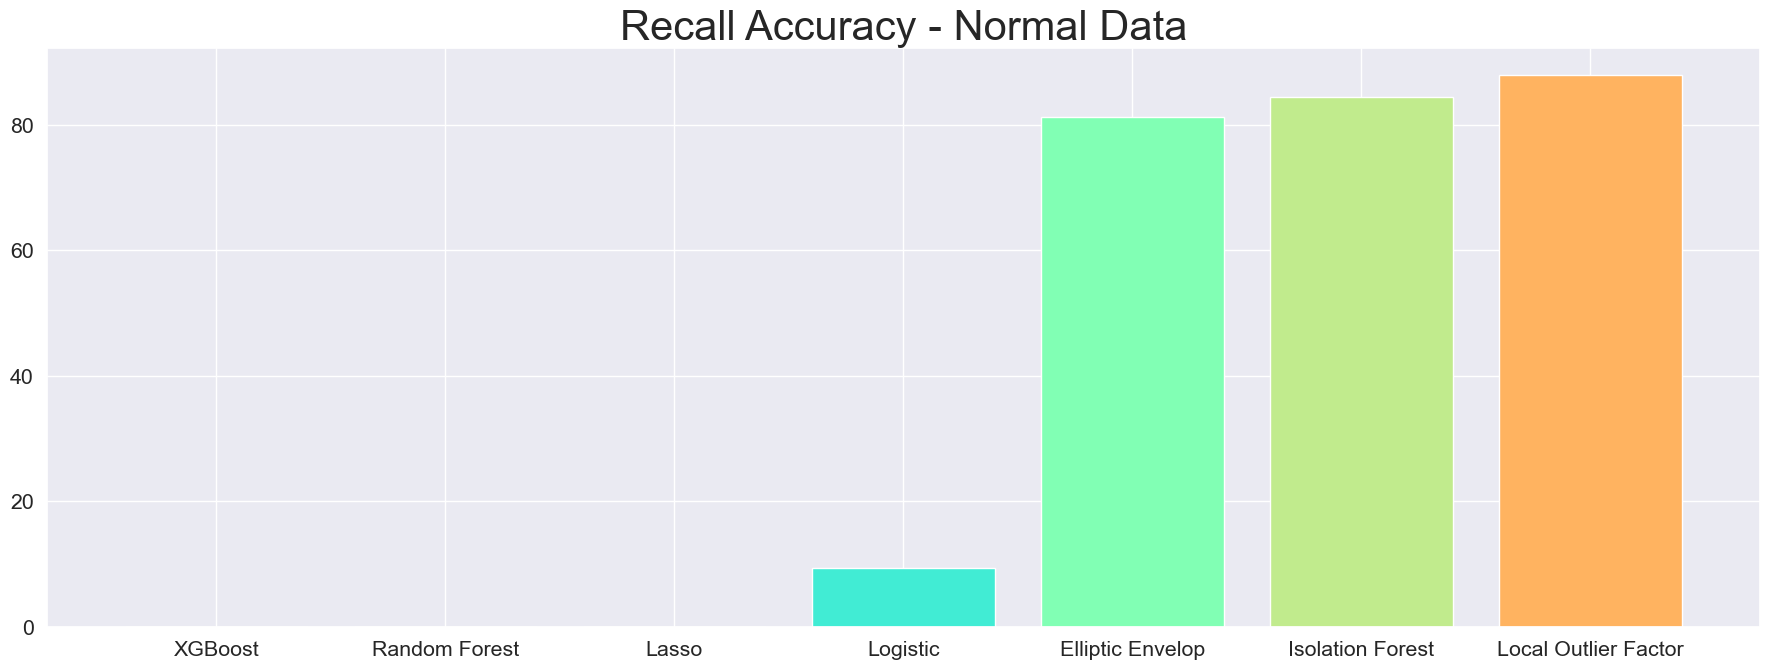

In [156]:
Recall = np.array([84.4, 87.9, 81.3,9.4,0,0,0])
label = np.array(['Isolation Forest', 'Local Outlier Factor', 'Elliptic Envelop',
                  'Logistic','XGBoost','Random Forest','Lasso'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - Normal Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

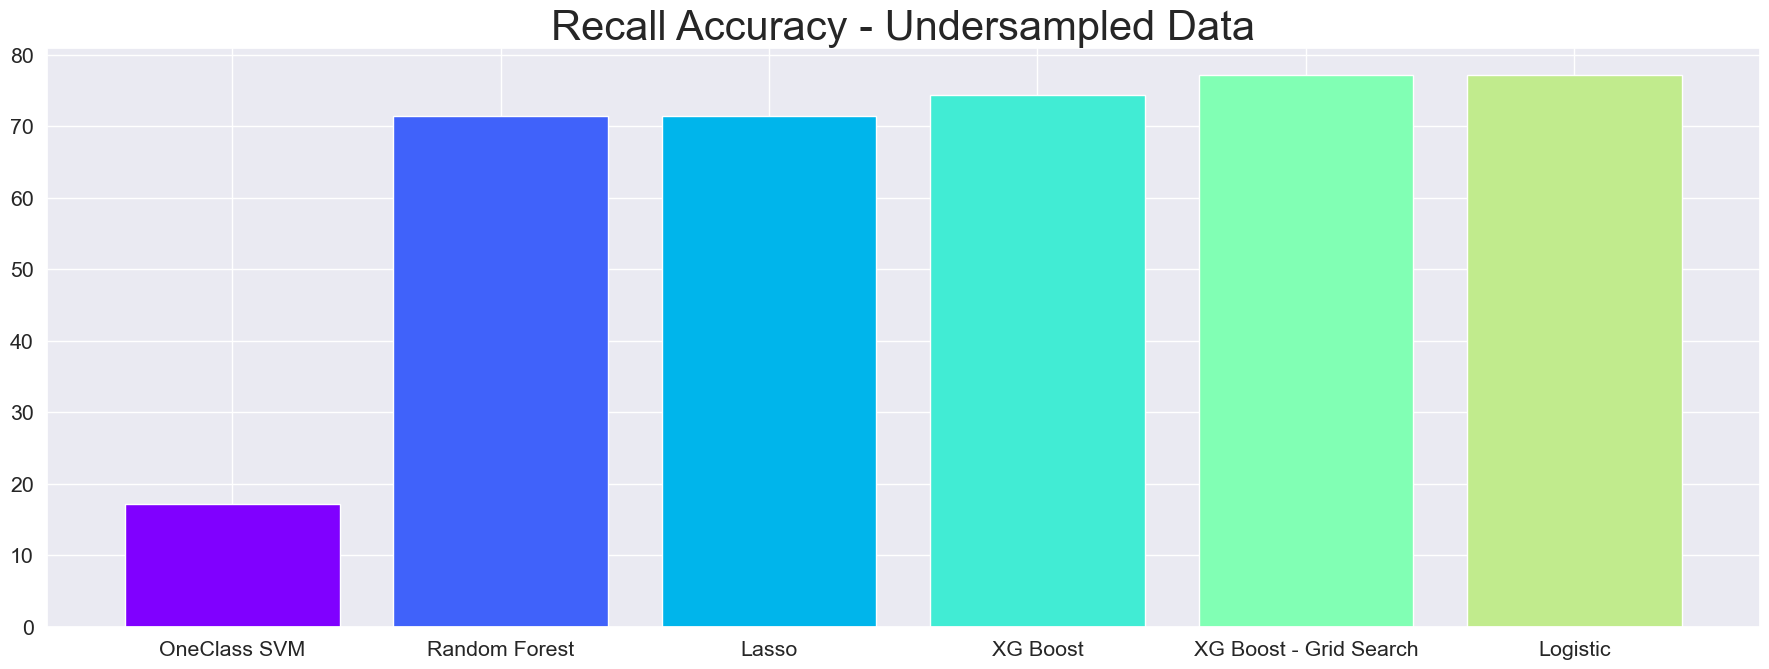

In [157]:
Recall = np.array([74.3,77.1,71.4,77.1,71.4,17.1])
label = np.array(['XG Boost','XG Boost - Grid Search','Random Forest','Logistic','Lasso','OneClass SVM'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - Undersampled Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

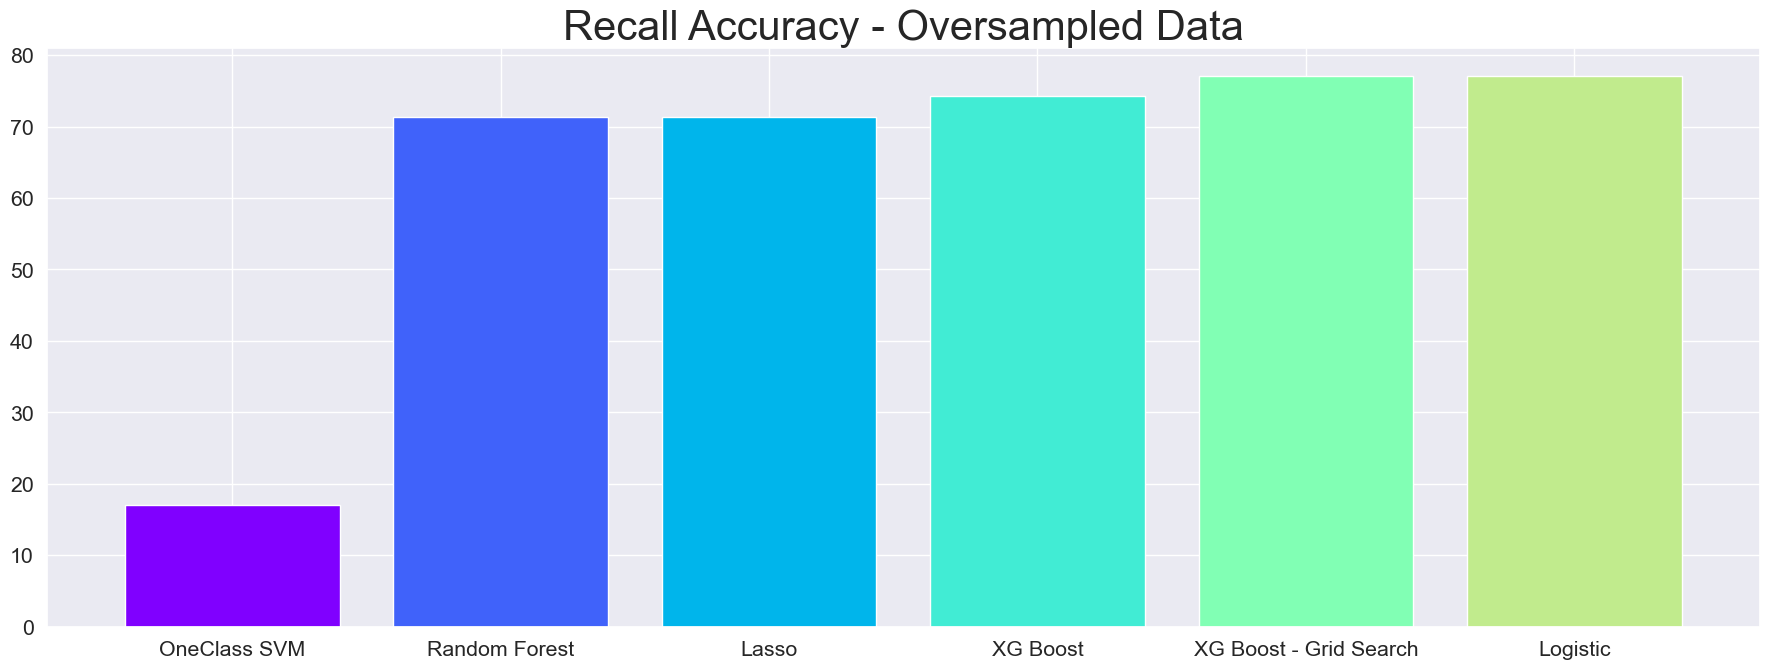

In [158]:
Recall = np.array([74.3,77.1,71.4,77.1,71.4,17.1])
label = np.array(['XG Boost','XG Boost - Grid Search','Random Forest','Logistic','Lasso','OneClass SVM'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - Oversampled Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

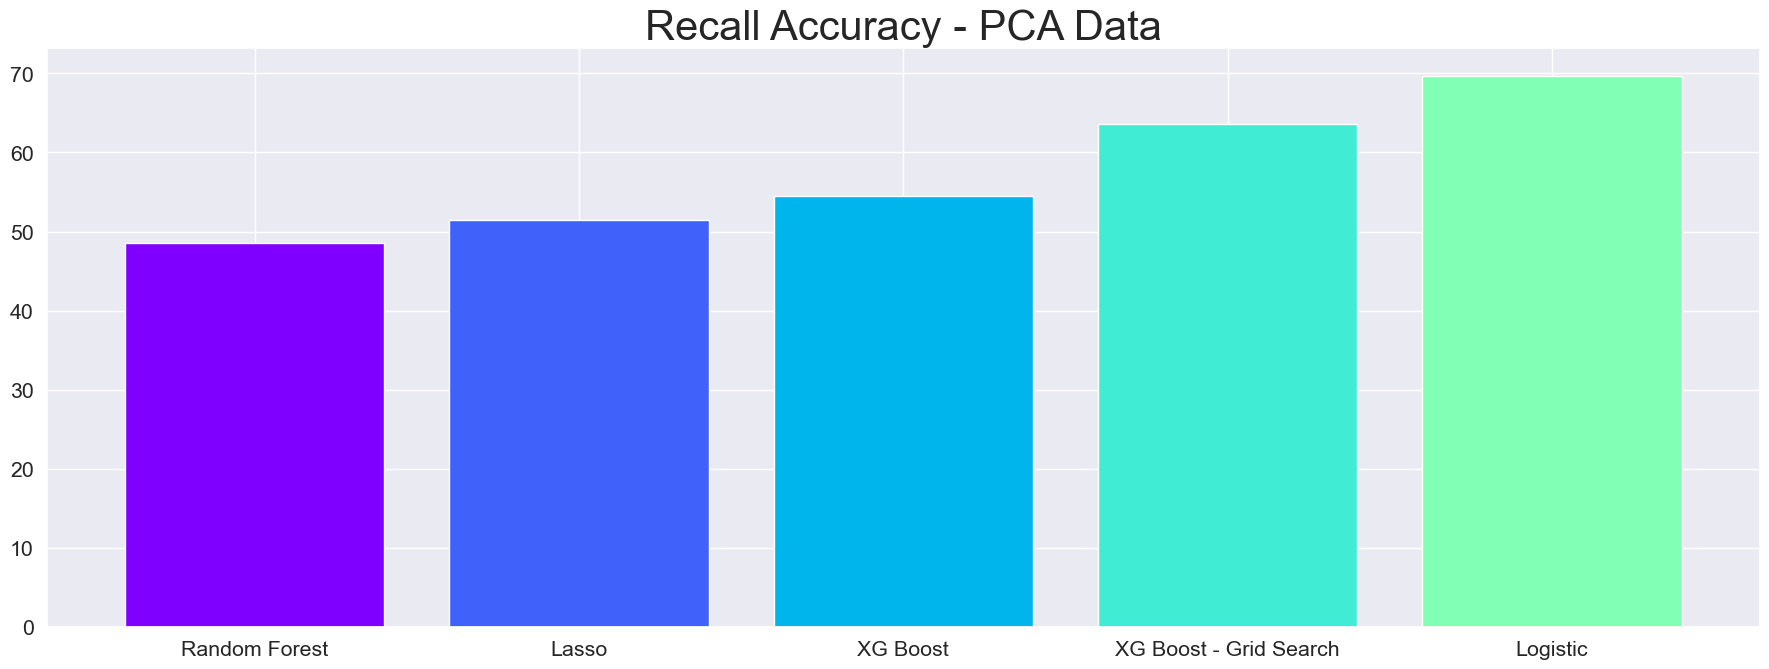

In [159]:
Recall = np.array([54.5,63.6,48.5,69.7,51.5])
label = np.array(['XG Boost','XG Boost - Grid Search','Random Forest','Logistic','Lasso'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy - PCA Data', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

[13:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program

<Figure size 8000x8000 with 0 Axes>

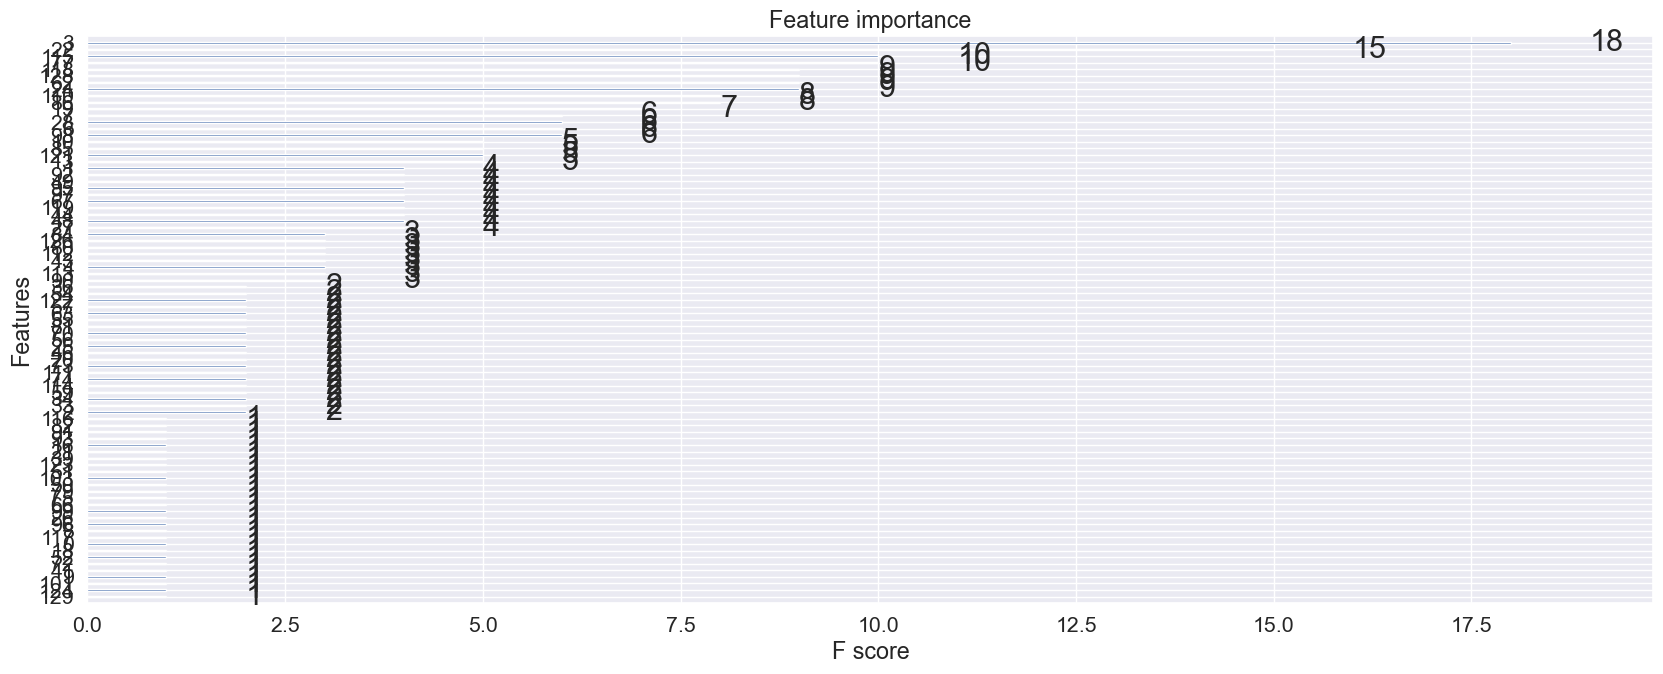

In [160]:
# plotting the feature importances

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
pyplot.rcParams.update({'font.size': 22})
from matplotlib.pyplot import figure
figure(num=None, figsize=(100, 100), dpi=80, facecolor='w', edgecolor='k')
# fit model no training data
model = XGBClassifier()
model.fit(x_train_us, y_train_us)
# plot feature importance
plot_importance(model)
pyplot.show()

In [161]:
featureImp = []
for feat, importance in zip(data.columns, model.feature_importances_):  
    temp = [feat, importance*100]
    featureImp.append(temp)

fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

    Feature  Importance
33       60    5.234727
129     190    4.106083
24       36    3.941841
3         3    3.713923
44       78    3.667818
..      ...         ...
78      120    0.000000
83      130    0.000000
87      137    0.000000
88      138    0.000000
65      102    0.000000

[130 rows x 2 columns]


## We have tried multiple models Logistic Regression, Random Forest, XG Boost (with and without Grid Search),OneClassSVM, Elliptic Envelop, Isolation Forest and Local Outlier Factor for the imbalanced classes
## Across methods OneClassSVM performed the worst while Local Outlier Factor performed the best in terms of recall accuracy
## We saw that for imbalanced classes accuracy and recall are invertially proportional to each other. Better recall models have lower accuracy and vice versa.
## We have tried two sampling techniques -first one using SMOTE (oversampling) and second one 
## using random based method (undersampling), Oversampling gave better results than undersampling in 
## terms of accuracy. Recall score was similar for both undersampling and oversampling.
## We did Z score scaling on both the datasets and took PCA with n_components as 130 (90% variance coverage). However PCA did not improve either accuracy or recall probably as we were loosing information due to dropping dimensions.
## We tried K-fold cross validation within XG Boost itself with bext value as 2 for all the models
## Using feature importance, we found that 72, 74 and 45 are the top three important 
## features. The best recall value at 88% was for Local Outlier Factor algorithm, the best part was no sampling was required as the algorithm took care of sampling as well as outliers. 
## classifier on the failure observations